## Exploration and Visualization

#### these are my upcoming plans:
## 📊 Hotel Booking Demand – Data Exploration & Visualization Agenda

This notebook covers data exploration and visualization for the Hotel Booking Demand dataset. The focus is on identifying patterns in the data, understanding booking behaviors, and uncovering factors associated with cancellations.

> 🔧 *Note: This exploration excludes missing value handling and feature engineering.* (As it is handled by other team mates. I will try to write the visualization codes as functions to use on cleaned data later)

---

Target Variable: `is_canceled`

---

### 1. Hotel & Booking Type Analysis
- Bar plot: Bookings per hotel type
- Stacked bar chart: Cancellation rate per hotel
- Count plots for:
  - `meal`
  - `distribution_channel`
  - `market_segment`
  - `customer_type`

---

### 2. Temporal Trends
- Line plot: Total bookings over time using `arrival_date`
- Bar plot: Monthly booking volume or cancellation rate
- Bar plot: Bookings by day of week
- Box plot: ADR (`adr`) distribution across months

---

### 3. Guest Composition
- Count plots: `adults`, `children`, `babies`
- Total guests per booking (can be visualized without feature creation)
- Bookings with vs. without children

---

### 4. Booking Behavior
- Histogram or box plot: `lead_time`
- Box plot: `adr` (average daily rate)
- Count plots for:
  - `required_car_parking_spaces`
  - `total_of_special_requests`
  - `deposit_type`

---

### 5. Numerical Correlations
- Heatmap of correlations between numeric features
- Scatter plots:
  - `lead_time` vs. `adr`
  - `adr` vs. `is_canceled`

---

### 6. Summary of Key Findings
- Visual patterns or anomalies
- Preliminary indicators related to cancellation behavior
- Feature insights to inform modeling (for the next phase)


In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import calendar
from scipy.stats import pointbiserialr
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)




In [ ]:
data = pd.read_csv(r'C:\Users\cheng\Documents\GitHub\Data_Mining_Project\UMA_IE500_Data_Mining\Data_exploration_and_visualization\hotel_bookings_with_specific_arrival_date.csv')
import pandas as pd

# Already loaded
# data = pd.read_csv(r'...') ← your path

# 1. View the first 5 rows
display(data.head())

# 2. Overview of data types and non-null counts
print("\n Basic Info:\n")
data.info()

# 3. Descriptive statistics for numerical columns
print("\n Descriptive Stats (Numerical Columns):\n")
display(data.describe())

# 4. Number of unique values per column
print("\n Unique Value Counts per Column:\n")
unique_counts = data.nunique().sort_values(ascending=False)
display(unique_counts)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,14.0,179.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,14.0,179.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,14.0,179.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,179.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,179.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01



🧾 Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,76.800998,179.572897,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,105.933541,31.438891,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,179.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,179.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000



🔢 Unique Value Counts per Column:



adr                               8866
reservation_status_date            926
arrival_date                       793
lead_time                          479
company                            348
agent                              333
country                            177
days_in_waiting_list               127
previous_bookings_not_canceled      73
arrival_date_week_number            53
stays_in_week_nights                33
arrival_date_day_of_month           31
booking_changes                     19
stays_in_weekend_nights             17
previous_cancellations              15
adults                              14
arrival_date_month                  12
assigned_room_type                  11
reserved_room_type                   9
market_segment                       8
total_of_special_requests            6
meal                                 5
babies                               5
children                             5
required_car_parking_spaces          5
distribution_channel     

In [58]:
def plot_cancellation_distribution(data):
    counts = data['is_canceled'].value_counts()
    labels = ['Not Canceled', 'Canceled']
    total = counts.sum()
    percentages = [(count / total) * 100 for count in counts]

    # Bar plot
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x='is_canceled', data=data, palette=['#99badf', '#29a15c'])
    plt.title('Booking Cancellation Distribution')
    plt.xlabel('Is Canceled')
    plt.ylabel('Count')
    plt.xticks([0, 1], labels)

    # Add text labels
    for p, percent in zip(ax.patches, percentages):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 100,
                f'{percent:.1f}%', ha="center", fontsize=11)

    plt.tight_layout()
    plt.show()

    # Pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#99badf', '#29a15c'])
    plt.title('Cancellation Ratio')
    plt.tight_layout()
    plt.show()

    # Print counts
    print(f"Canceled: {counts[1]} bookings ({percentages[1]:.2f}%)")
    print(f"Not Canceled: {counts[0]} bookings ({percentages[0]:.2f}%)")


def plot_cancellation_by_category(data, column, palette='pastel'):
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(data=data, x=column, y='is_canceled', estimator='mean', palette=palette)
    plt.title(f'Cancellation Rate by {column.replace("_", " ").title()}')
    plt.ylabel('Cancellation Rate')
    plt.xticks(rotation=45)

    # Annotate bars with exact percentages
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
                    f'{height * 100:.1f}%', ha="center", fontsize=10)

    plt.tight_layout()
    plt.show()



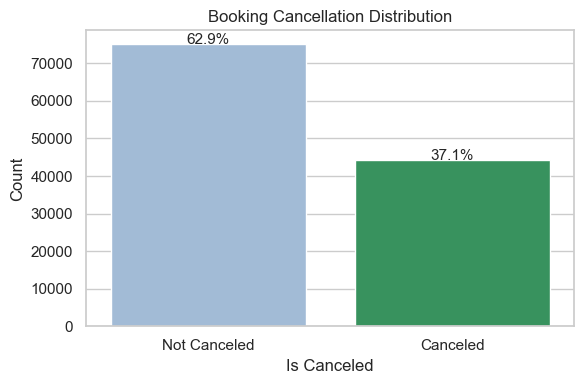

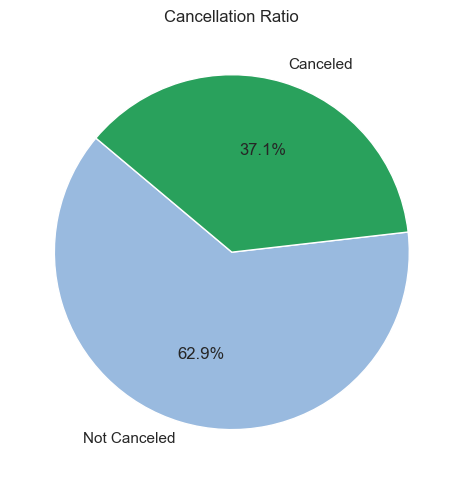

Canceled: 44199 bookings (37.08%)
Not Canceled: 75011 bookings (62.92%)


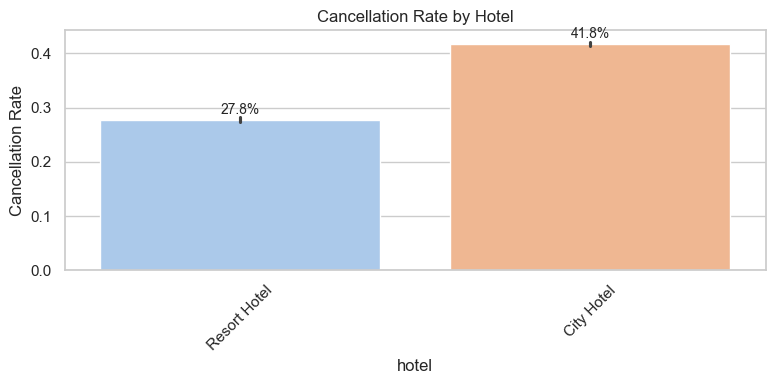

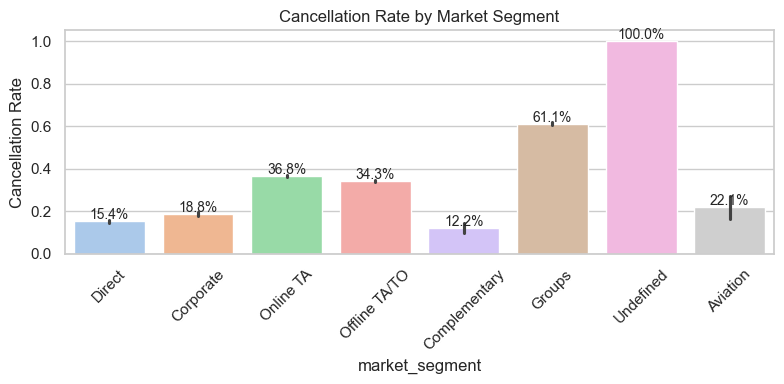

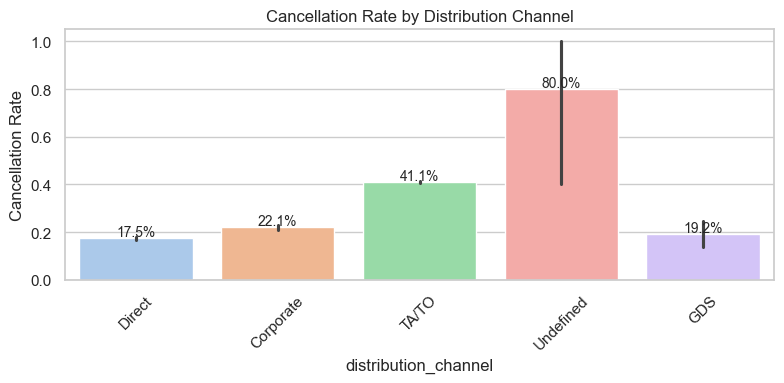

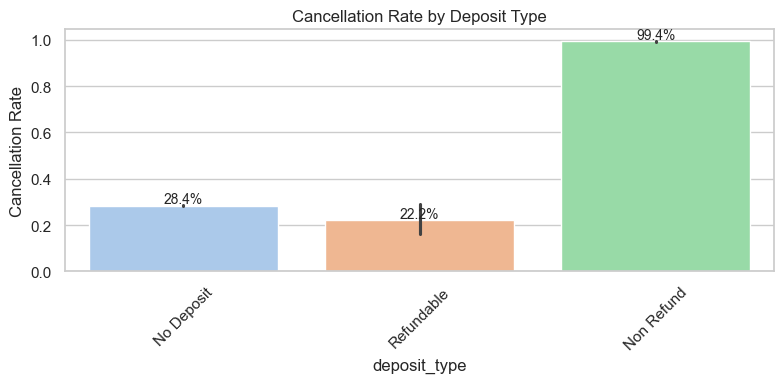

In [206]:
# Overall cancellation distribution
plot_cancellation_distribution(data)

# By hotel
plot_cancellation_by_category(data, 'hotel')

# By market segment
plot_cancellation_by_category(data, 'market_segment')

# By distribution channel
plot_cancellation_by_category(data, 'distribution_channel')

# By deposit type
plot_cancellation_by_category(data, 'deposit_type')


In [52]:

# Colors for known hue categories
custom_palettes = {
    'hotel': {
        'Resort Hotel': '#99badf',
        'City Hotel': '#29a15c'
    },
    'deposit_type': {
        'No Deposit': '#99badf',
        'Refundable': '#29a15c',
        'Non Refund': '#073E7F'
    }
}

def plot_interaction(x, hue, col, title, data, palette):
    subset_data = data[[x, hue, col]].dropna()

    # Create the catplot
    g = sns.catplot(
        data=subset_data,
        x=x, hue=hue, col=col,
        kind='count', height=4, aspect=1.2,
        palette=palette
    )

    # Axis labels and titles
    g.set_axis_labels(x.capitalize(), "Count")
    g.set_titles(col_template="{col_name} Cancellation")
    g.fig.suptitle(title, y=1.07)

    # Rotate x-axis labels for clarity
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')

    # Remove legends from each subplot
    for ax in g.axes.flat:
        legend = ax.get_legend()
        if legend:
            legend.remove()

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)
    plt.show()




def draw_global_legend(hue_key):
    palette = custom_palettes.get(hue_key, {})
    handles = [Patch(facecolor=color, edgecolor='black', label=label) for label, color in palette.items()]

    plt.figure(figsize=(4, 1))
    plt.legend(handles=handles, title=hue_key.capitalize(), loc='center', ncol=len(handles), frameon=False)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


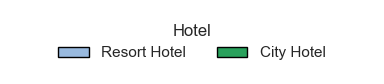

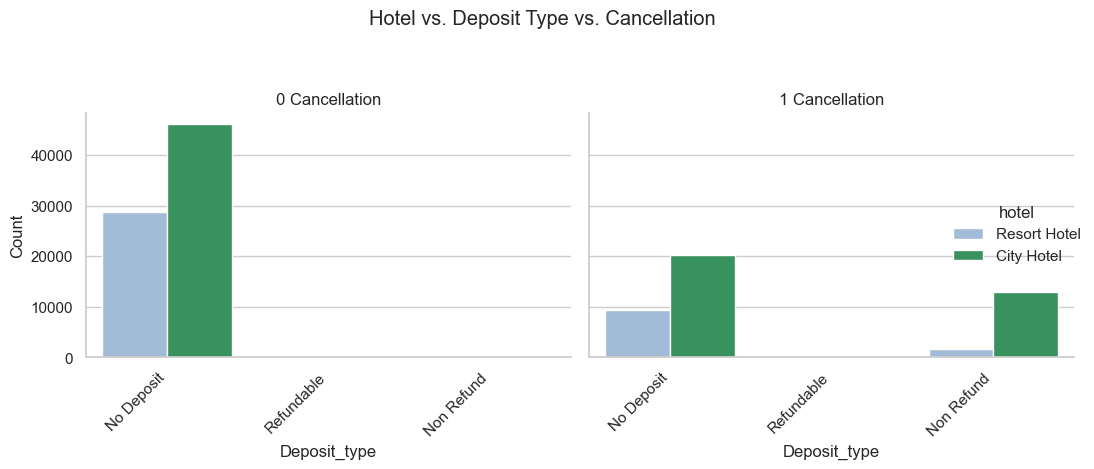

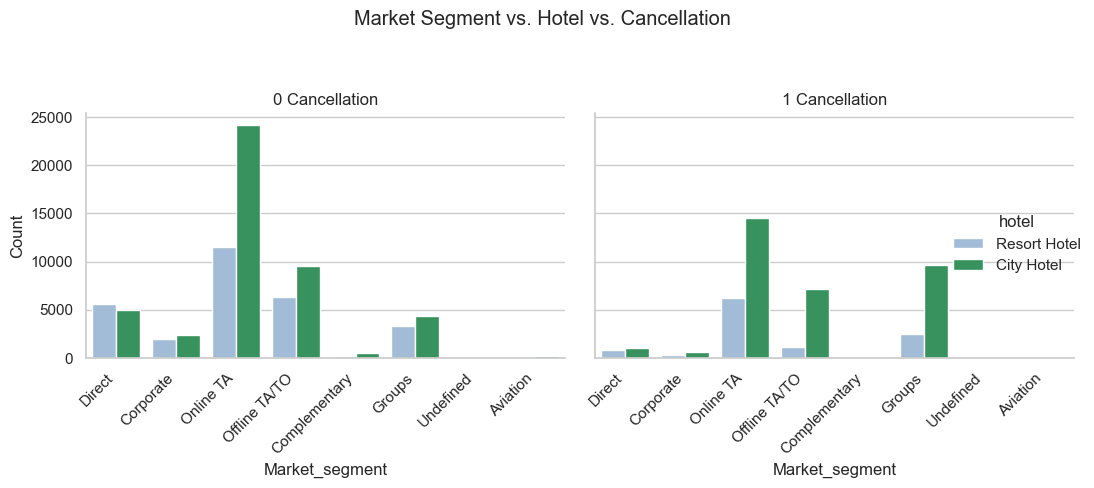

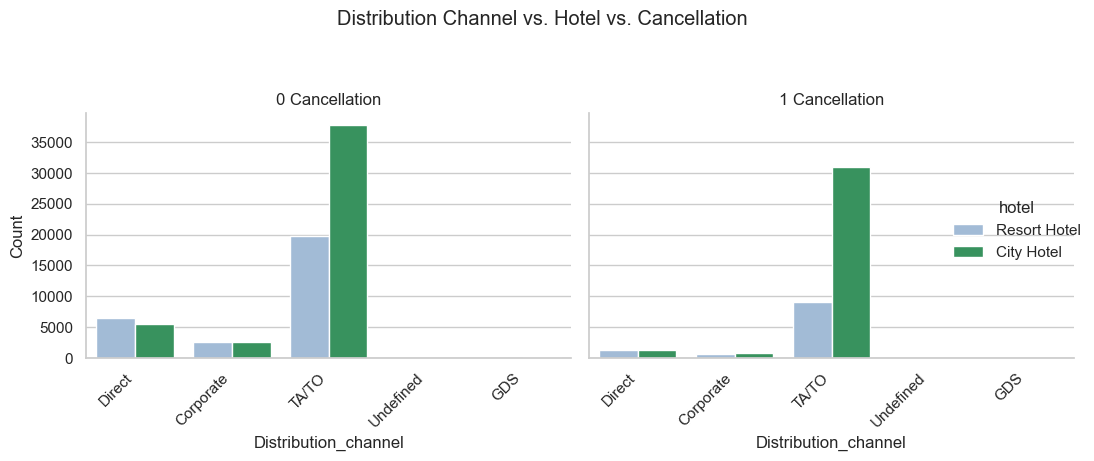

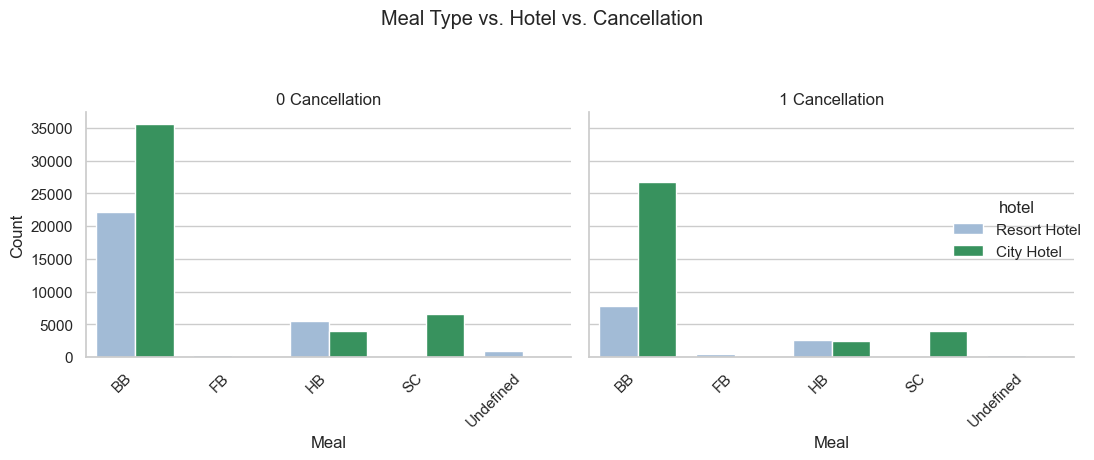

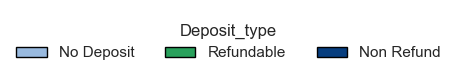

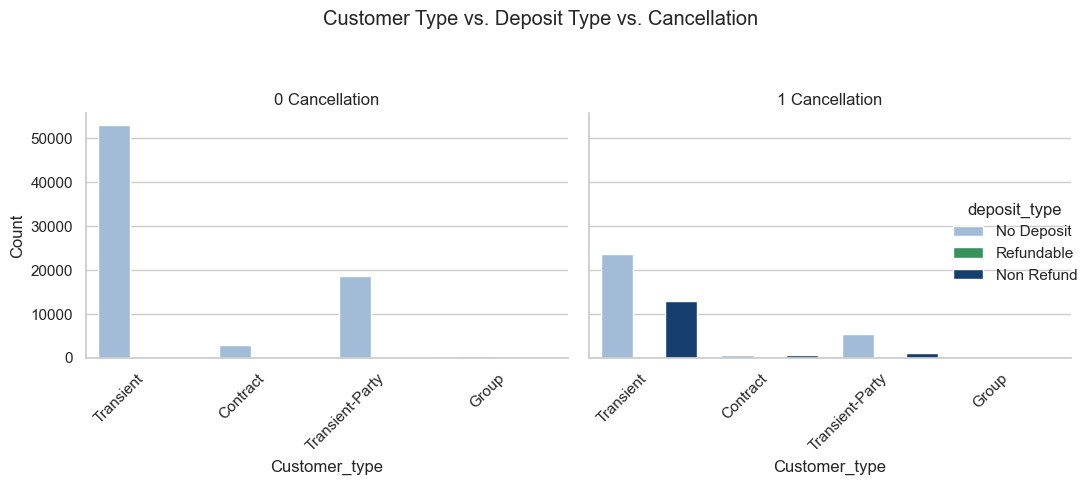

In [53]:
# Legend for hotel
draw_global_legend('hotel')

plot_interaction('deposit_type', 'hotel', 'is_canceled', 'Hotel vs. Deposit Type vs. Cancellation', data, custom_palettes['hotel'])
plot_interaction('market_segment', 'hotel', 'is_canceled', 'Market Segment vs. Hotel vs. Cancellation', data, custom_palettes['hotel'])
plot_interaction('distribution_channel', 'hotel', 'is_canceled', 'Distribution Channel vs. Hotel vs. Cancellation', data, custom_palettes['hotel'])
plot_interaction('meal', 'hotel', 'is_canceled', 'Meal Type vs. Hotel vs. Cancellation', data, custom_palettes['hotel'])

# Legend for deposit_type
draw_global_legend('deposit_type')

plot_interaction('customer_type', 'deposit_type', 'is_canceled', 'Customer Type vs. Deposit Type vs. Cancellation', data, custom_palettes['deposit_type'])


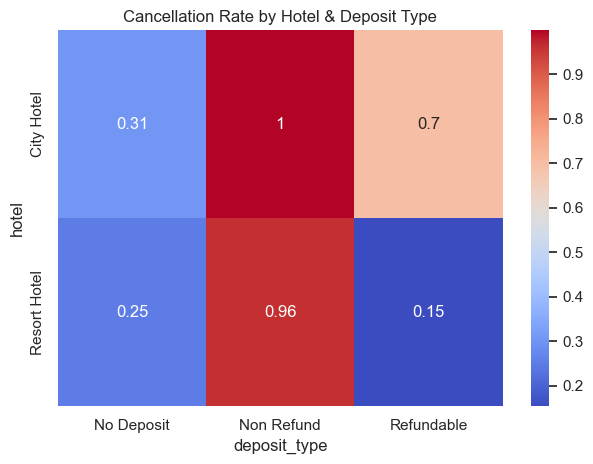

In [15]:
pivot = data.pivot_table(values='is_canceled', index='hotel', columns='deposit_type')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Cancellation Rate by Hotel & Deposit Type')
plt.tight_layout()
plt.show()


In [ ]:
# Total, overall overviwes


# def plot_total_bookings_by_category(data, category, palette=None):
#     plt.figure(figsize=(6, 4))
#     sns.countplot(data=data, x=category, palette=palette)
#     plt.title(f'Total Bookings by {category.replace("_", " ").title()}')
#     plt.xlabel(category.replace("_", " ").title())
#     plt.ylabel('Number of Bookings')
#     plt.tight_layout()
#     plt.show()

# def plot_stacked_cancellation_rate(data, category, colors=['#99badf', '#29a15c']):
#     ctab = pd.crosstab(data[category], data['is_canceled'], normalize='index')

#     ctab.plot(kind='bar', stacked=True, color=colors, figsize=(6, 4))
#     plt.title(f'Cancellation Rate per {category.replace("_", " ").title()}')
#     plt.xlabel(category.replace("_", " ").title())
#     plt.ylabel('Proportion')
#     plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
#     plt.tight_layout()
#     plt.show()

    
# def plot_categorical_distribution_by_cancellation(data, feature_list, palette=['#99badf', '#29a15c']):
#     for feature in feature_list:
#         plt.figure(figsize=(7, 4))
#         sns.countplot(data=data, x=feature, hue='is_canceled', palette=palette)
#         plt.title(f'{feature.replace("_", " ").title()} by Cancellation Status')
#         plt.xlabel(feature.replace("_", " ").title())
#         plt.ylabel('Count')
#         plt.xticks(rotation=45, ha='right')
#         plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
#         plt.tight_layout()
#         plt.show()



In [57]:
# A. Hotel-wise total bookings
# plot_total_bookings_by_category(data, category='hotel', palette=['#99badf', '#29a15c'])

# B. Hotel-wise cancellation rate
# plot_stacked_cancellation_rate(data, category='hotel')

# C. Other booking types by cancellation
#features = ['meal', 'distribution_channel', 'market_segment', 'customer_type']
# plot_categorical_distribution_by_cancellation(data, feature_list=features)


### Temporal Treds

In [62]:
# If 'arrival_date' is object type, convert it to datetime
data['arrival_date'] = pd.to_datetime(data['arrival_date'], errors='coerce')
# Map month names to month numbers for sorting later
month_map = {month: index for index, month in enumerate(calendar.month_name) if month}
data['arrival_month_num'] = data['arrival_date_month'].map(month_map)



In [99]:
def plot_smoothed_bookings_cancellations(data, window=14):
    # Daily aggregation
    daily = data.groupby('arrival_date')['is_canceled'].agg(
        total_bookings='count',
        cancellations='sum'
    )
    daily['cancellation_rate'] = daily['cancellations'] / daily['total_bookings']
    daily_rolling = daily.rolling(window=window).mean()

    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax1.plot(daily_rolling.index, daily_rolling['total_bookings'], label='Total Bookings (Smoothed)', color='#073E7F')
    ax1.plot(daily_rolling.index, daily_rolling['cancellations'], label='Cancellations (Smoothed)', color='#29A15C')
    ax1.set_ylabel('Count')
    ax1.set_xlabel('Arrival Date')
    ax1.set_title(f'Bookings and Cancellations (Rolling {window}-Day Avg)')
    ax2 = ax1.twinx()
    ax2.plot(daily_rolling.index, daily_rolling['cancellation_rate'], label='Cancellation Rate', color='black', linestyle='--')
    ax2.set_ylabel('Cancellation Rate')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(
        lines1 + lines2, labels1 + labels2,
        loc='center left', bbox_to_anchor=(1.08, 0.5),
        fontsize=10, title='Legend', frameon=True
    )
    plt.tight_layout()
    plt.show()


def plot_monthly_bookings_cancellations(data):
    data['arrival_month'] = data['arrival_date'].dt.to_period('M')
    monthly = data.groupby('arrival_month')['is_canceled'].agg(
        total_bookings='count',
        cancellations='sum'
    ).astype(int)
    monthly['cancellation_rate'] = monthly['cancellations'] / monthly['total_bookings']

    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax1.plot(monthly.index.to_timestamp(), monthly['total_bookings'], label='Total Bookings', color='#073E7F', marker='o')
    ax1.plot(monthly.index.to_timestamp(), monthly['cancellations'], label='Cancellations', color='#29A15C', marker='o')
    ax1.set_ylabel('Count')
    ax1.set_xlabel('Arrival Month')
    ax1.set_title('Monthly Bookings and Cancellations')
    ax2 = ax1.twinx()
    ax2.plot(monthly.index.to_timestamp(), monthly['cancellation_rate'], label='Cancellation Rate', color='black', linestyle='--', marker='x')
    ax2.set_ylabel('Cancellation Rate')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(
        lines1 + lines2, labels1 + labels2,
        loc='center left', bbox_to_anchor=(1.08, 0.5),
        fontsize=10, title='Legend', frameon=True
    )

    plt.tight_layout()
    plt.show()



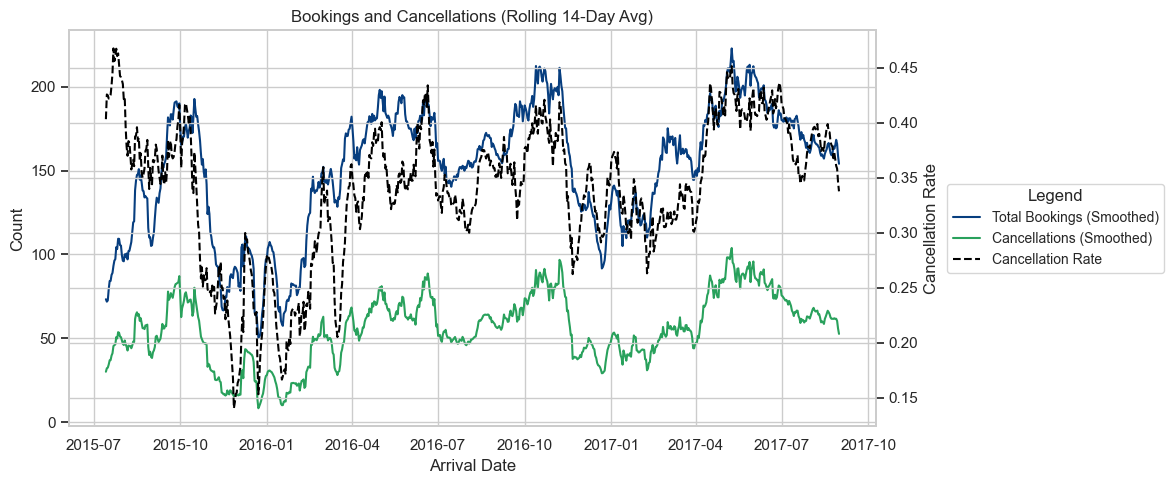

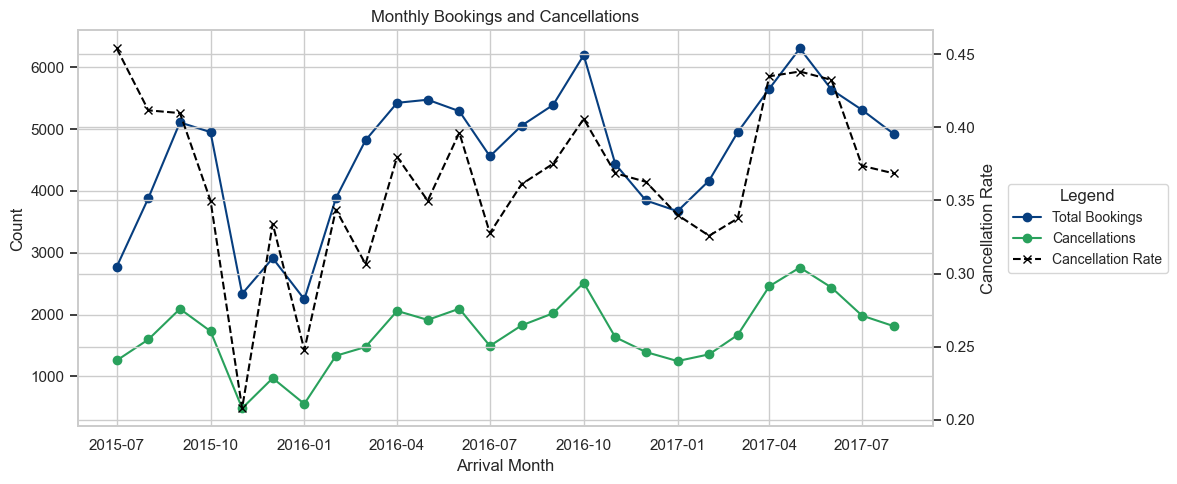

In [115]:
plot_smoothed_bookings_cancellations(data)
plot_monthly_bookings_cancellations(data)  # for enhanced correlation clarity

In [108]:
def plot_smoothed_bookings_cancellations_split(data, window=14):
    fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

    y1_max, y2_max = 0, 0
    for hotel in ['Resort Hotel', 'City Hotel']:
        hotel_data = data[data['hotel'] == hotel]
        daily = hotel_data.groupby('arrival_date')['is_canceled'].agg(
            total_bookings='count',
            cancellations='sum'
        )
        daily['cancellation_rate'] = daily['cancellations'] / daily['total_bookings']
        rolling = daily.rolling(window=window).mean()
        y1_max = max(y1_max, rolling[['total_bookings', 'cancellations']].max().max())
        y2_max = max(y2_max, rolling['cancellation_rate'].max())
    y1_max = int((y1_max + 10) // 10 * 10)
    y2_max = round(y2_max + 0.05, 2)

    for i, hotel in enumerate(['Resort Hotel', 'City Hotel']):
        hotel_data = data[data['hotel'] == hotel]
        daily = hotel_data.groupby('arrival_date')['is_canceled'].agg(
            total_bookings='count',
            cancellations='sum'
        )
        daily['cancellation_rate'] = daily['cancellations'] / daily['total_bookings']
        rolling = daily.rolling(window=window).mean()

        ax = axes[i]
        ax.plot(rolling.index, rolling['total_bookings'], label='Total Bookings', color='#073E7F')
        ax.plot(rolling.index, rolling['cancellations'], label='Cancellations', color='#29A15C')
        ax.set_ylabel('Count')
        ax.set_ylim(0, y1_max)
        ax.set_title(f'{hotel} – Rolling {window}-Day Avg')
        ax2 = ax.twinx()
        ax2.plot(rolling.index, rolling['cancellation_rate'], label='Cancellation Rate', color='black', linestyle='--')
        ax2.set_ylabel('Cancellation Rate')
        ax2.set_ylim(0, y2_max)
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(
            lines1 + lines2, labels1 + labels2,
            loc='center left', bbox_to_anchor=(1.08, 0.5),
            fontsize=10, title='Legend', frameon=True
        )

    plt.suptitle('Rolling Bookings & Cancellations by Hotel Type (Uniform Scale)', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


def plot_monthly_bookings_cancellations_split(data):
    data['arrival_month'] = data['arrival_date'].dt.to_period('M')
    fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
    y1_max, y2_max = 0, 0

    for hotel in ['Resort Hotel', 'City Hotel']:
        hotel_data = data[data['hotel'] == hotel]
        monthly = hotel_data.groupby('arrival_month')['is_canceled'].agg(
            total_bookings='count',
            cancellations='sum'
        ).astype(int)
        monthly['cancellation_rate'] = monthly['cancellations'] / monthly['total_bookings']
        y1_max = max(y1_max, monthly[['total_bookings', 'cancellations']].max().max())
        y2_max = max(y2_max, monthly['cancellation_rate'].max())
    y1_max = int((y1_max + 100) // 100 * 100)
    y2_max = round(y2_max + 0.05, 2)

    for i, hotel in enumerate(['Resort Hotel', 'City Hotel']):
        hotel_data = data[data['hotel'] == hotel]
        monthly = hotel_data.groupby('arrival_month')['is_canceled'].agg(
            total_bookings='count',
            cancellations='sum'
        ).astype(int)
        monthly['cancellation_rate'] = monthly['cancellations'] / monthly['total_bookings']

        ax = axes[i]
        ax.plot(monthly.index.to_timestamp(), monthly['total_bookings'], label='Total Bookings', color='#073E7F', marker='o')
        ax.plot(monthly.index.to_timestamp(), monthly['cancellations'], label='Cancellations', color='#29A15C', marker='o')
        ax.set_ylabel('Count')
        ax.set_ylim(0, y1_max)
        ax.set_title(f'{hotel} – Monthly Bookings and Cancellations')
        ax2 = ax.twinx()
        ax2.plot(monthly.index.to_timestamp(), monthly['cancellation_rate'], label='Cancellation Rate', color='black', linestyle='--', marker='x')
        ax2.set_ylabel('Cancellation Rate')
        ax2.set_ylim(0, y2_max)
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(
            lines1 + lines2, labels1 + labels2,
            loc='center left', bbox_to_anchor=(1.08, 0.5),
            fontsize=10, title='Legend', frameon=True
        )

    plt.suptitle('Monthly Bookings & Cancellations by Hotel Type (Uniform Scale)', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


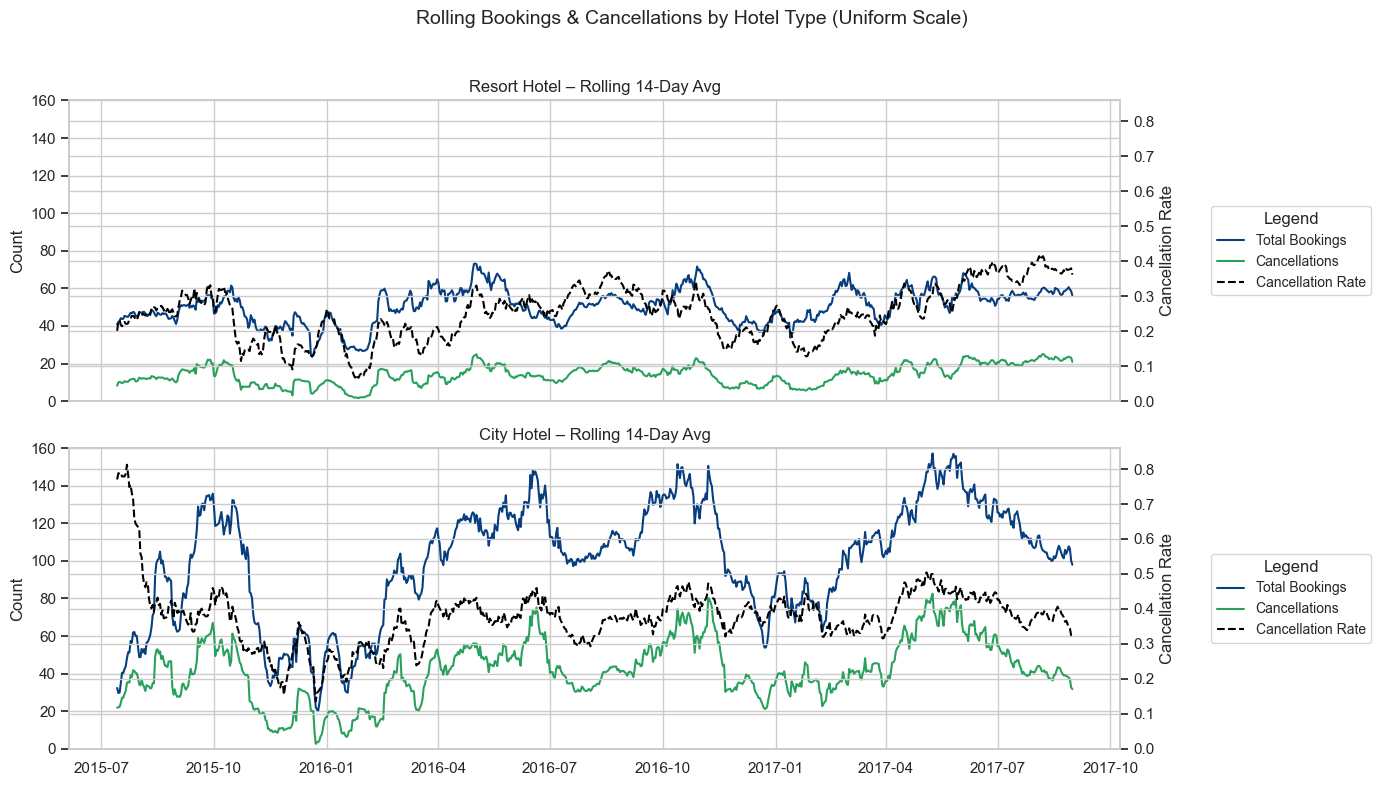

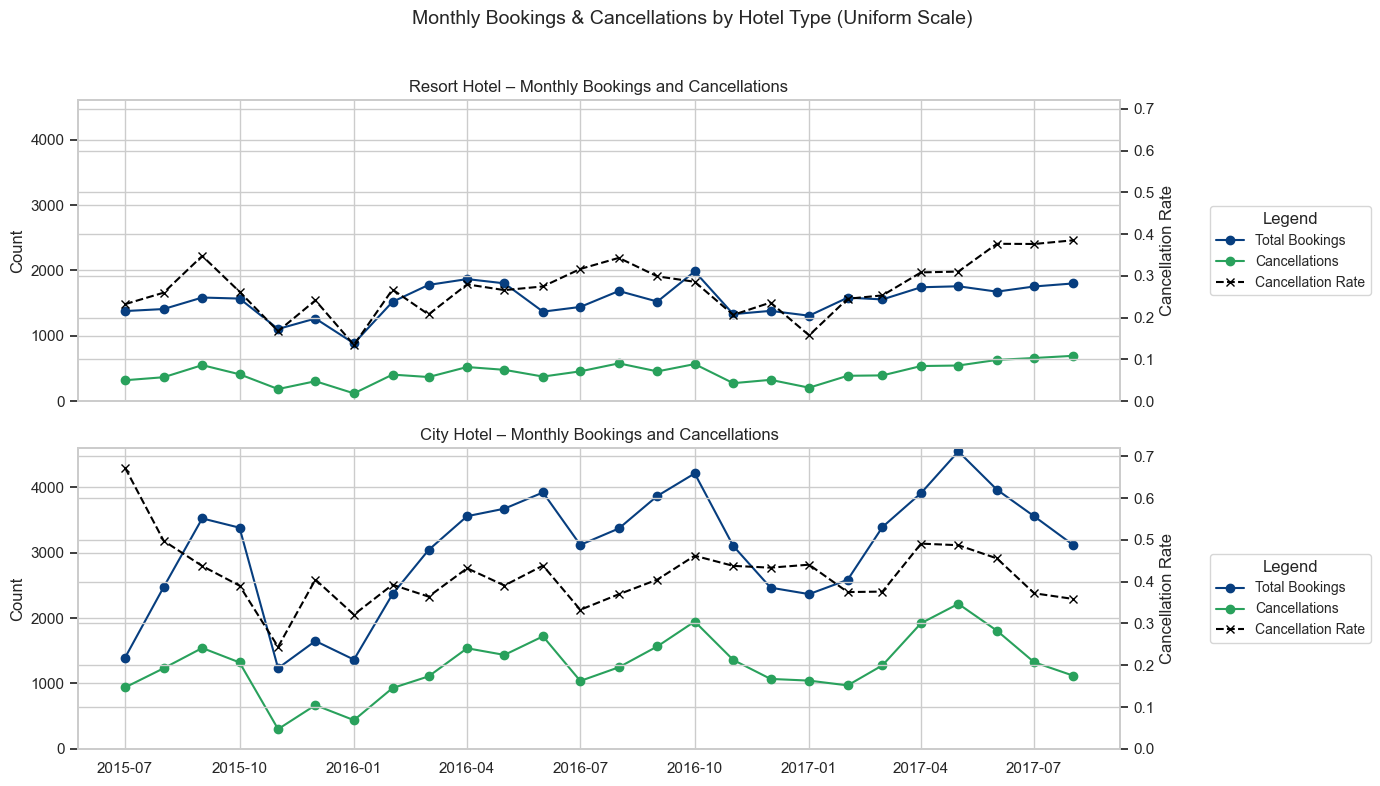

In [116]:
plot_smoothed_bookings_cancellations_split(data)
plot_monthly_bookings_cancellations_split(data)

In [ ]:
# def plot_bookings_over_time(data):
#     bookings_by_date = data['arrival_date'].value_counts().sort_index()
#     plt.figure(figsize=(12, 4))
#     bookings_by_date.plot()
#     plt.title('Number of Bookings Over Time')
#     plt.xlabel('Arrival Date')
#     plt.ylabel('Number of Bookings')
#     plt.tight_layout()
#     plt.show()


# def plot_bookings_over_time_by_hotel(data):
#     bookings = data.groupby(['arrival_date', 'hotel']).size().unstack(fill_value=0)
#     fig, ax = plt.subplots(figsize=(12, 4))
#     bookings.plot(ax=ax)
#     ax.set_title('Bookings Over Time by Hotel')
#     ax.set_xlabel('Arrival Date')
#     ax.set_ylabel('Number of Bookings')
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Hotel')
#     plt.tight_layout()
#     plt.show()



# def plot_bookings_by_month(data):
#     month_order = list(calendar.month_name)[1:]  # Jan to Dec
#     monthly = data['arrival_date_month'].value_counts().reindex(month_order)
#     plt.figure(figsize=(10, 4))
#     sns.barplot(x=monthly.index, y=monthly.values, palette='pastel')
#     plt.title('Total Bookings per Month')
#     plt.ylabel('Number of Bookings')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


def plot_bookings_by_month_with_line(data):
    month_order = list(calendar.month_name)[1:]
    booking_counts = data.groupby(['arrival_date_month', 'hotel']).size().unstack().reindex(month_order)
    fig, ax = plt.subplots(figsize=(10, 5))
    booking_counts.plot(kind='bar', width=0.8, ax=ax, color=['#99badf', '#29a15c'])
    booking_counts.plot(marker='o', linewidth=2, ax=ax)
    ax.set_title('Monthly Bookings by Hotel (Bar + Line)')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Bookings')
    ax.set_xticklabels(booking_counts.index, rotation=45)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Hotel')
    plt.tight_layout()
    plt.show()



# def plot_cancellation_rate_by_month(data):
#     # Use month number for sorting
#     cancel_rate = data.groupby(['arrival_date_month'])['is_canceled'].mean()
#     cancel_rate = cancel_rate.reindex(list(calendar.month_name)[1:])  # Ordered
#     plt.figure(figsize=(10, 4))
#     sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette='Set2')
#     plt.title('Cancellation Rate per Month')
#     plt.ylabel('Cancellation Rate')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

def plot_cancellation_rate_by_month_by_hotel(data):
    cancel_rate = data.groupby(['arrival_date_month', 'hotel'])['is_canceled'].mean().unstack().reindex(list(calendar.month_name)[1:])
    fig, ax = plt.subplots(figsize=(10, 5))
    cancel_rate.plot(kind='bar', width=0.8, ax=ax, color=['#99badf', '#29a15c'])
    cancel_rate.plot(marker='o', linewidth=2, ax=ax)
    ax.set_title('Monthly Cancellation Rate by Hotel')
    ax.set_ylabel('Cancellation Rate')
    ax.set_xlabel('Month')
    ax.set_xticklabels(cancel_rate.index, rotation=45)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Hotel')
    plt.tight_layout()
    plt.show()




# def plot_bookings_by_weekday(data):
#     data['weekday'] = data['arrival_date'].dt.day_name()
#     weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#     counts = data['weekday'].value_counts().reindex(weekday_order)
#     plt.figure(figsize=(10, 4))
#     sns.barplot(x=counts.index, y=counts.values, palette='pastel')
#     plt.title('Total Bookings by Day of the Week')
#     plt.ylabel('Number of Bookings')
#     plt.tight_layout()
#     plt.show()

def plot_bookings_by_weekday_by_hotel(data):
    data['weekday'] = data['arrival_date'].dt.day_name()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_counts = data.groupby(['weekday', 'hotel']).size().unstack().reindex(weekday_order)
    fig, ax = plt.subplots(figsize=(10, 4))
    weekday_counts.plot(kind='bar', ax=ax, color=['#99badf', '#29a15c'])
    weekday_counts.plot(marker='o', ax=ax, linewidth=2)
    ax.set_title('Bookings by Weekday and Hotel')
    ax.set_ylabel('Number of Bookings')
    ax.set_xlabel('Weekday')
    ax.set_xticklabels(weekday_counts.index)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Hotel')
    plt.tight_layout()
    plt.show()



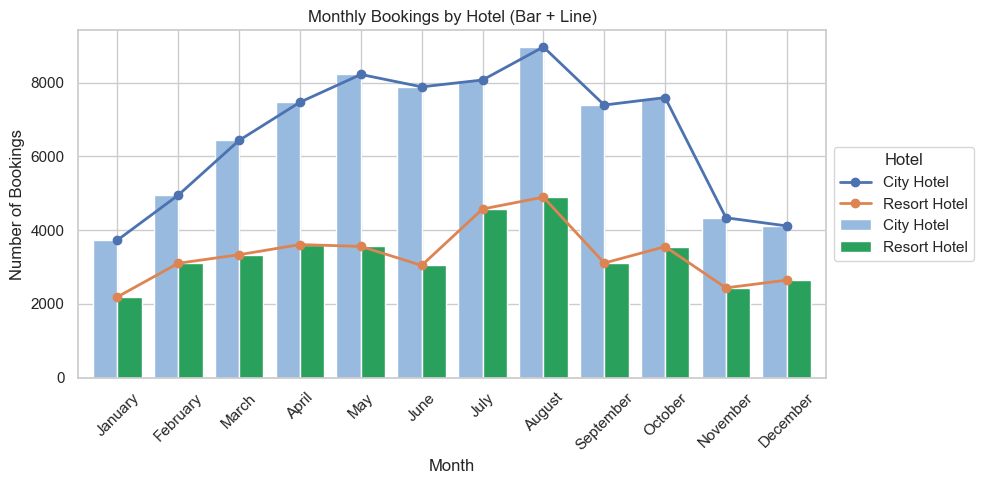

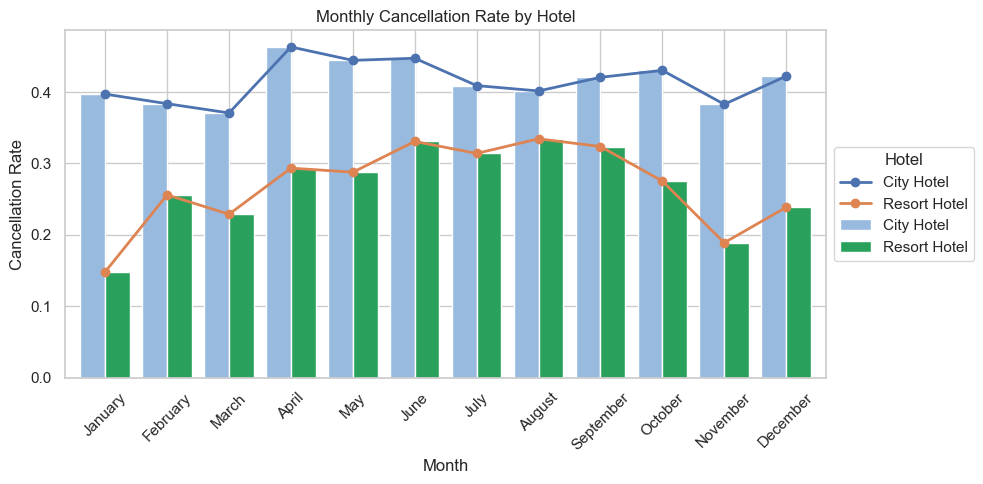

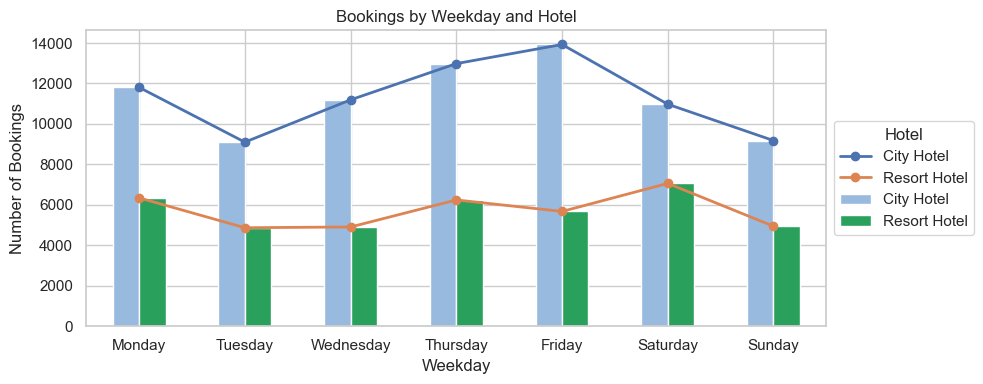

In [114]:

plot_bookings_by_month_with_line(data)
plot_cancellation_rate_by_month_by_hotel(data)
plot_bookings_by_weekday_by_hotel(data)



In [77]:
# For detailed and datily trend progression, we can use the following code. However, this is not recommended as it 
# appears to be noisy and has therefore low readability.


# def plot_bookings_and_cancellations_over_time(data):
#     # Prepare daily counts
#     daily_counts = data.groupby(['arrival_date'])['is_canceled'].agg([
#         ('total_bookings', 'count'),
#         ('cancellations', 'sum')
#     ])
#     daily_counts['cancellation_rate'] = daily_counts['cancellations'] / daily_counts['total_bookings']

#     # Plot bookings and cancellations
#     fig, ax1 = plt.subplots(figsize=(12, 4))

#     ax1.plot(daily_counts.index, daily_counts['total_bookings'], color='#073E7F', label='Total Bookings', linewidth=1.5)
#     ax1.plot(daily_counts.index, daily_counts['cancellations'], color='#29A15C', label='Cancellations', linewidth=1.5)
#     ax1.set_ylabel('Count')
#     ax1.set_xlabel('Arrival Date')
#     ax1.set_title('Bookings and Cancellations Over Time')
#     ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.tight_layout()
#     plt.show()

# def plot_bookings_cancellations_with_rate(data):
#     # Aggregate daily
#     daily = data.groupby('arrival_date')['is_canceled'].agg(
#         total_bookings='count',
#         cancellations='sum'
#     )
#     daily['cancellation_rate'] = daily['cancellations'] / daily['total_bookings']

#     fig, ax1 = plt.subplots(figsize=(12, 5))

#     # Bookings and Cancellations (left y-axis)
#     ax1.plot(daily.index, daily['total_bookings'], label='Total Bookings', color='#073E7F', linewidth=1.5)
#     ax1.plot(daily.index, daily['cancellations'], label='Cancellations', color='#29A15C', linewidth=1.5)
#     ax1.set_xlabel('Arrival Date')
#     ax1.set_ylabel('Count')
#     ax1.set_title('Bookings, Cancellations & Rate Over Time')

#     # Cancellation Rate (right y-axis)
#     ax2 = ax1.twinx()
#     ax2.plot(daily.index, daily['cancellation_rate'], label='Cancellation Rate', color='black', linestyle='--', linewidth=1.2)
#     ax2.set_ylabel('Cancellation Rate')

#     # Combined legend
#     lines1, labels1 = ax1.get_legend_handles_labels()
#     lines2, labels2 = ax2.get_legend_handles_labels()
#     ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1, 0.5))

#     plt.tight_layout()
#     plt.show()


In [ ]:
# If needed for more details - on individual years

# def plot_monthly_bookings_by_year_and_hotel(data):
#     # Prepare month order
#     month_order = list(calendar.month_name)[1:]
#     data['arrival_month'] = pd.to_datetime(dict(
#         year=data['arrival_date_year'],
#         month=data['arrival_date_month'].apply(lambda x: month_order.index(x) + 1),
#         day=1
#     ))
#     monthly_counts = data.groupby(['arrival_date_year', 'arrival_date_month', 'hotel']).size().reset_index(name='bookings')
#     monthly_counts['month_num'] = monthly_counts['arrival_date_month'].apply(lambda x: month_order.index(x) + 1)
#     monthly_counts = monthly_counts.sort_values(by=['arrival_date_year', 'month_num'])

#     for hotel in ['Resort Hotel', 'City Hotel']:
#         plt.figure(figsize=(10, 5))
#         subset = monthly_counts[monthly_counts['hotel'] == hotel]

#         sns.lineplot(
#             data=subset,
#             x='month_num',
#             y='bookings',
#             hue='arrival_date_year',
#             marker='o',
#             palette='Set2'
#         )
#         plt.xticks(ticks=range(1, 13), labels=month_order, rotation=45)
#         plt.title(f'Monthly Bookings by Year – {hotel}')
#         plt.xlabel('Month')
#         plt.ylabel('Number of Bookings')
#         plt.legend(title='Year', loc='upper right')
#         plt.tight_layout()
#         plt.show()


# def plot_monthly_cancellation_rate_by_year_and_hotel(data):
#     # Prepare month order
#     month_order = list(calendar.month_name)[1:]
#     data['month_num'] = data['arrival_date_month'].apply(lambda x: month_order.index(x) + 1)
#     cancel_rates = (
#         data.groupby(['arrival_date_year', 'month_num', 'hotel'])['is_canceled']
#         .mean()
#         .reset_index(name='cancellation_rate')
#         .sort_values(['arrival_date_year', 'month_num'])
#     )
#     for hotel in ['Resort Hotel', 'City Hotel']:
#         plt.figure(figsize=(10, 5))
#         subset = cancel_rates[cancel_rates['hotel'] == hotel]

#         sns.lineplot(
#             data=subset,
#             x='month_num',
#             y='cancellation_rate',
#             hue='arrival_date_year',
#             marker='o',
#             palette='Set1'
#         )

#         plt.xticks(ticks=range(1, 13), labels=month_order, rotation=45)
#         plt.title(f'Monthly Cancellation Rate by Year – {hotel}')
#         plt.xlabel('Month')
#         plt.ylabel('Cancellation Rate')
#         plt.ylim(0, 1)
#         plt.legend(title='Year', loc='upper right')
#         plt.tight_layout()
#         plt.show()



In [118]:

# plot_monthly_bookings_by_year_and_hotel(data)
# plot_monthly_cancellation_rate_by_year_and_hotel(data)  # for enhanced correlation clarity

### Visualizing guess information level
What we'll do:
Cancellation rate vs. number of guests:
Adults, children, babies → how cancellation rate changes per count
Total guests vs. cancellation: aggregated cancellation rate
Cancellation rate with vs. without children (keep this one)
Split all the above by hotel (City vs. Resort)



In [218]:
def plot_guest_cancellation_patterns(data):

    # Prep features
    data['total_guests'] = data['adults'] + data['children'] + data['babies']
    data['has_children'] = (data['children'] + data['babies']) > 0

    # Set up subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Cancellation rate vs. adults
    sns.barplot(
        data=data,
        x='adults', y='is_canceled',
        palette='pastel', ax=axes[0, 0],
        ci=95
    )
    axes[0, 0].set_title('Cancellation Rate by Number of Adults')

    # 2. Cancellation rate vs. children
    sns.barplot(
        data=data,
        x='children', y='is_canceled',
        palette='pastel', ax=axes[0, 1],
        ci=95
    )
    axes[0, 1].set_title('Cancellation Rate by Number of Children')

    # 3. Cancellation rate vs. babies
    sns.barplot(
        data=data,
        x='babies', y='is_canceled',
        palette='pastel', ax=axes[1, 0],
        ci=95
    )
    axes[1, 0].set_title('Cancellation Rate by Number of Babies')

    # 4. Cancellation rate vs. total guests
    sns.barplot(
        data=data,
        x='total_guests', y='is_canceled',
        palette='pastel', ax=axes[1, 1],
        ci=95
    )
    axes[1, 1].set_title('Cancellation Rate by Total Guests')

    for ax in axes.flat:
        ax.set_ylabel('Cancellation Rate')
        ax.set_xlabel('')
        ax.set_ylim(0, 1)

    plt.suptitle('Cancellation Rates by Guest Composition (with 95% CI)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- With vs. without children ---
    plt.figure(figsize=(6, 4))
    sns.barplot(data=data, x='has_children', y='is_canceled', palette='Set2', ci=95)
    plt.xticks([0, 1], ['No Children', 'With Children'])
    plt.ylabel('Cancellation Rate')
    plt.title('Cancellation Rate: With vs. Without Children (95% CI)')
    plt.tight_layout()
    plt.show()

    # --- Repeated guest vs. new guest ---
    plt.figure(figsize=(6, 4))
    sns.barplot(data=data, x='is_repeated_guest', y='is_canceled', palette='Set3', ci=95)
    plt.xticks([0, 1], ['New Guest', 'Repeated Guest'])
    plt.ylabel('Cancellation Rate')
    plt.title('Cancellation Rate: New vs. Repeated Guest (95% CI)')
    plt.tight_layout()
    plt.show()


def plot_cancellation_rate_by_stay_bins(data):
   

    data = data.copy()
    data['stay_bin'] = pd.cut(
        data['stays_in_week_nights'],
        bins=[0, 2, 4, 6, 10, 30],
        labels=['0–2', '3–4', '5–6', '7–10', '11+']
    )

    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=data,
        x='stay_bin',
        y='is_canceled',
        hue='hotel',
        ci=95,
        palette='pastel'
    )
    plt.title("Cancellation Rate by Weeknight Stay Duration")
    plt.ylabel("Cancellation Rate")
    plt.xlabel("Weeknight Stay Duration (Binned)")
    plt.tight_layout()
    plt.show()



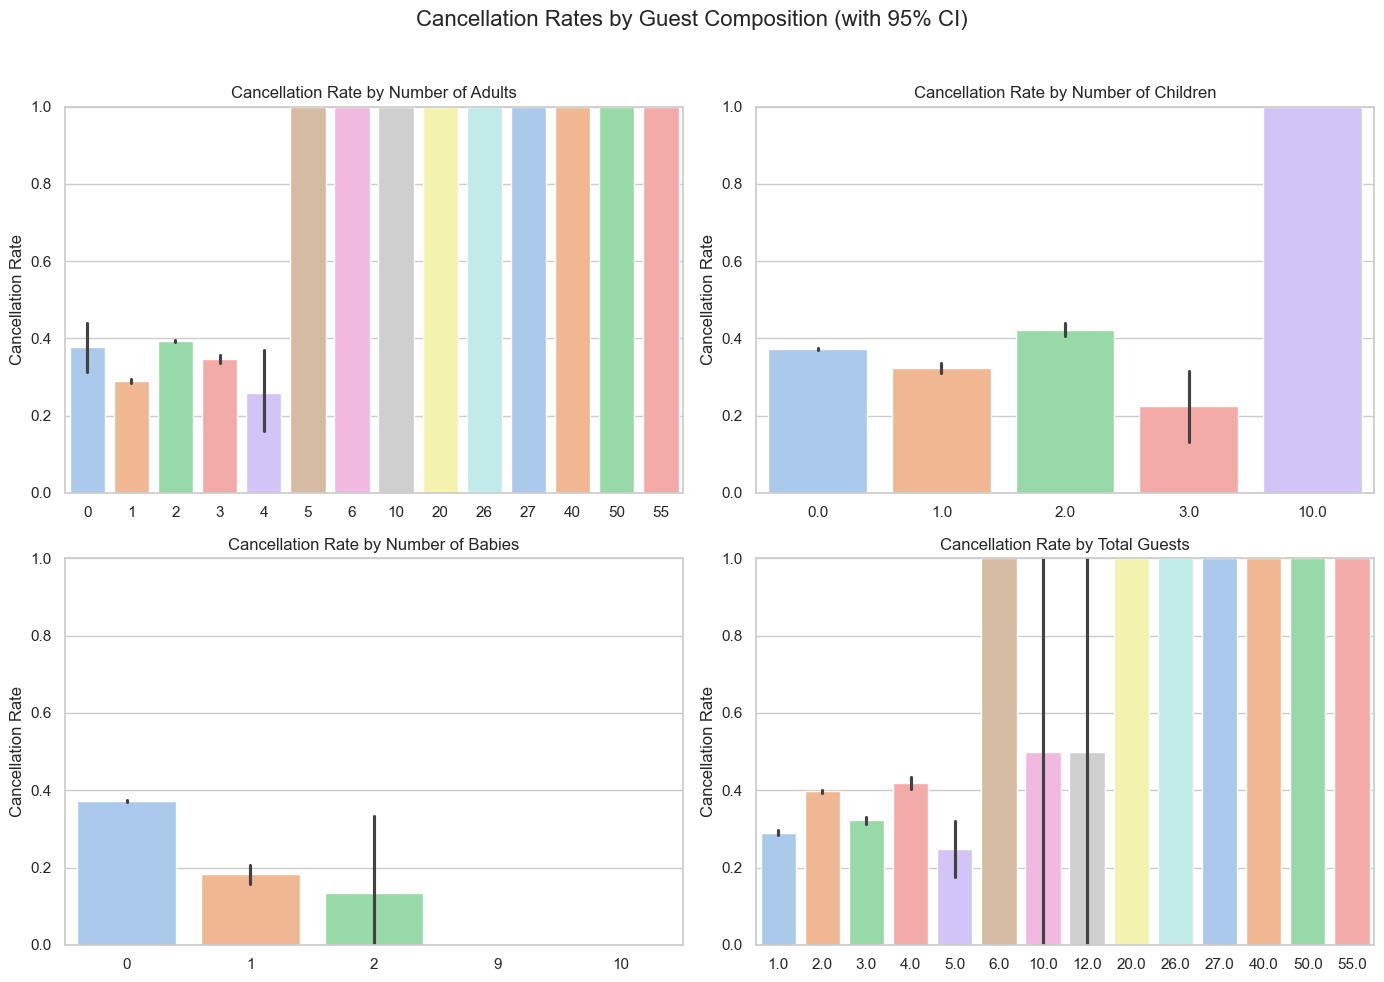

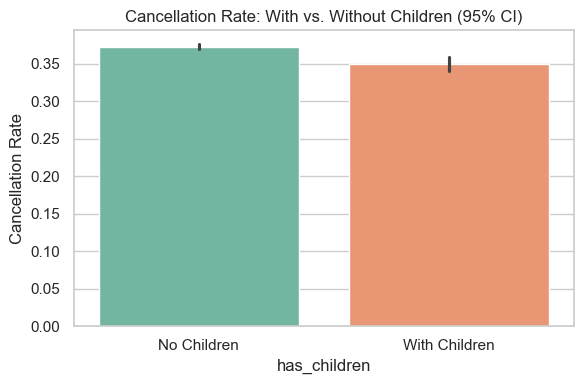

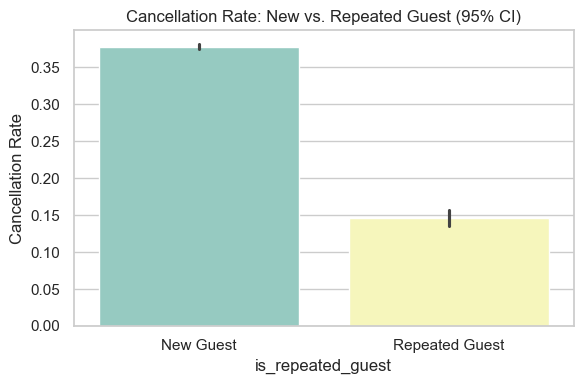

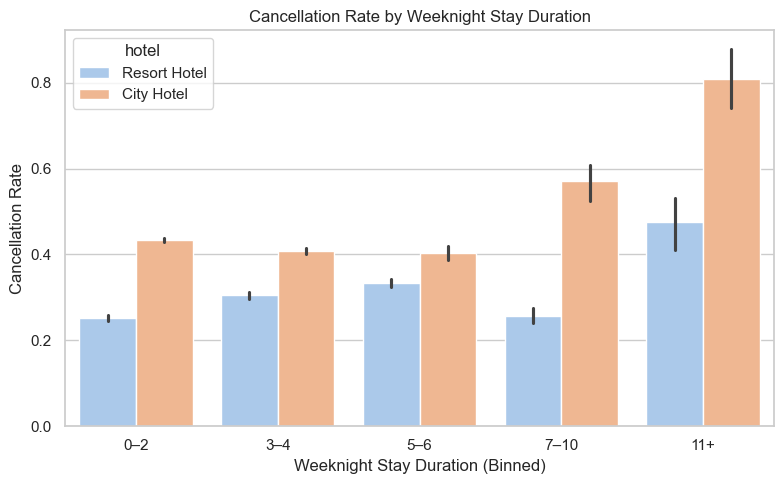

In [219]:
plot_guest_cancellation_patterns(data)
plot_cancellation_rate_by_stay_bins(data)

In [135]:
def plot_total_guests_cancellation_by_hotel(data):
    # Ensure total guests column exists
    data['total_guests'] = data['adults'] + data['children'] + data['babies']

    # Group and plot
    plt.figure(figsize=(12, 5))
    sns.barplot(
        data=data,
        x='total_guests', y='is_canceled', hue='hotel',
        palette=['#99badf', '#29a15c'],
        ci=95
    )

    plt.title('Cancellation Rate by Total Guests and Hotel Type (w/ 95% CI)')
    plt.ylabel('Cancellation Rate')
    plt.xlabel('Total Guests per Booking')
    plt.ylim(0, 1)
    plt.legend(title='Hotel')
    plt.tight_layout()
    plt.show()
    
def plot_total_guests_box_by_cancellation(data):
    data['total_guests'] = data['adults'] + data['children'] + data['babies']

    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=data,
        x='is_canceled',
        y='total_guests',
        palette=['#99badf', '#29a15c']
    )

    plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
    plt.title('Total Guests Distribution by Cancellation Status')
    plt.xlabel('Booking Status')
    plt.ylabel('Total Guests')
    plt.tight_layout()
    plt.show()


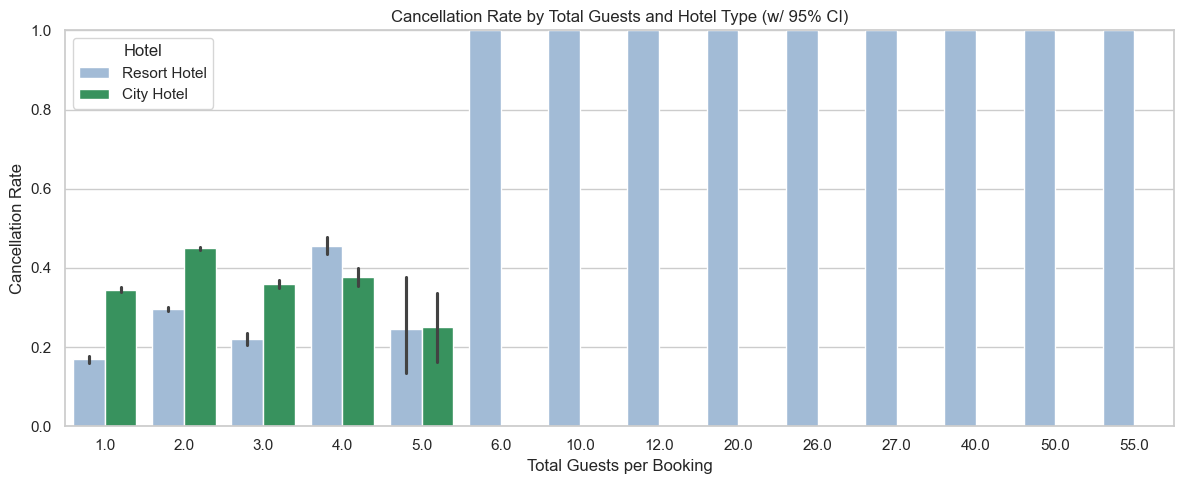

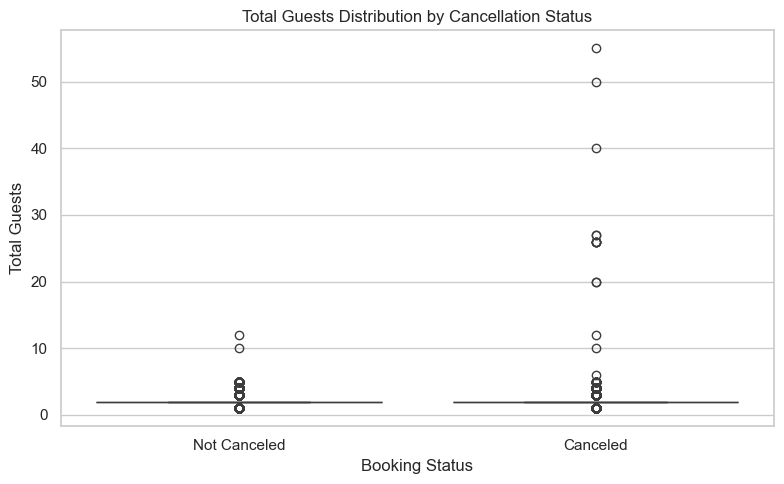

In [208]:
plot_total_guests_cancellation_by_hotel(data)
plot_total_guests_box_by_cancellation(data)


For bookings with 6, 10, 12, ..., 55 guests at Resort Hotel, the cancellation rate is 100%.?
This might be triggy to handle, as it appears all bookings that are registered are canceled with high amount of visitor


### Booking behaviour based on other facilities
lead_time	Numeric	Time between booking and arrival — long leads may cancel more
adr (average daily rate)	Numeric	High price = commitment? or risk?
required_car_parking_spaces	Discrete	Booking intent (serious guests?)
total_of_special_requests	Discrete	More requests → more invested? Or harder to fulfill?
deposit_type	Categorical	Financial commitment strategy

In [172]:
def plot_lead_time_and_adr_by_cancellation(data):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.boxplot(
        data=data,
        x='is_canceled',
        y='lead_time',
        palette=['#99badf', '#29a15c'],
        ax=axes[0]
    )
    axes[0].set_title('Lead Time vs. Cancellation')
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['Not Canceled', 'Canceled'])
    axes[0].set_ylabel('Lead Time')
    sns.boxplot(
        data=data,
        x='is_canceled',
        y='adr',
        palette=['#99badf', '#29a15c'],
        ax=axes[1]
    )
    axes[1].set_title('Average Daily Rate (ADR) vs. Cancellation')
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['Not Canceled', 'Canceled'])
    axes[1].set_ylabel('ADR (€)')
    plt.tight_layout()
    plt.show()

def plot_booking_behavior_counts(data):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set(style="whitegrid")
    fig, axes = plt.subplots(3, 3, figsize=(20, 12))  # Increased grid for 7 plots

    behavior_vars = [
        ('required_car_parking_spaces', 'Parking Spaces'),
        ('total_of_special_requests', 'Special Requests'),
        ('deposit_type', 'Deposit Type'),
        ('booking_changes', 'Booking Changes'),
        ('previous_cancellations', 'Previous Cancellations'),
        ('previous_bookings_not_canceled', 'Previous Non-Canceled Bookings'),
        ('days_in_waiting_list', 'Days in Waiting List'),
    ]

    for ax, (col, title) in zip(axes.flat, behavior_vars):
        plot_data = data[data[col] <= 4] if data[col].dtype != 'object' else data
        sns.countplot(
            data=plot_data,
            x=col,
            hue='is_canceled',
            palette=['#99badf', '#29a15c'],
            ax=ax
        )
        ax.set_title(f'{title} vs. Cancellation')
        ax.set_xlabel(col.replace('_', ' ').title())
        ax.set_ylabel("Count")
        ax.legend(title='Canceled', labels=['No', 'Yes'])

    # Remove unused subplots if any
    for ax in axes.flat[len(behavior_vars):]:
        ax.remove()

    plt.suptitle('Booking Behavior vs. Cancellation (Both Hotels)', y=1.03, fontsize=16)
    plt.tight_layout()
    plt.show()







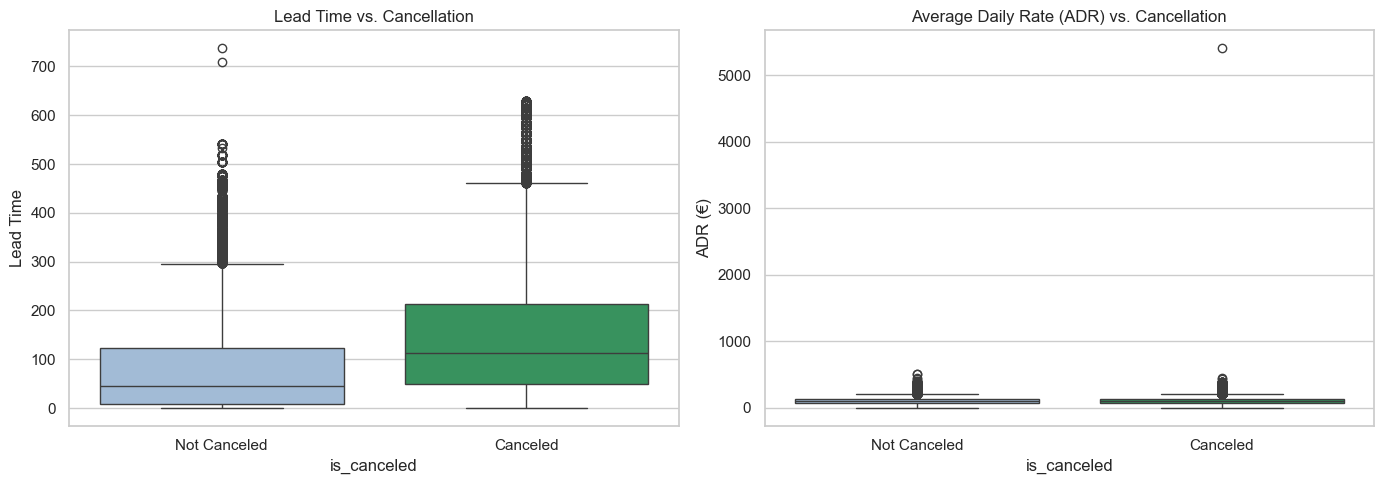

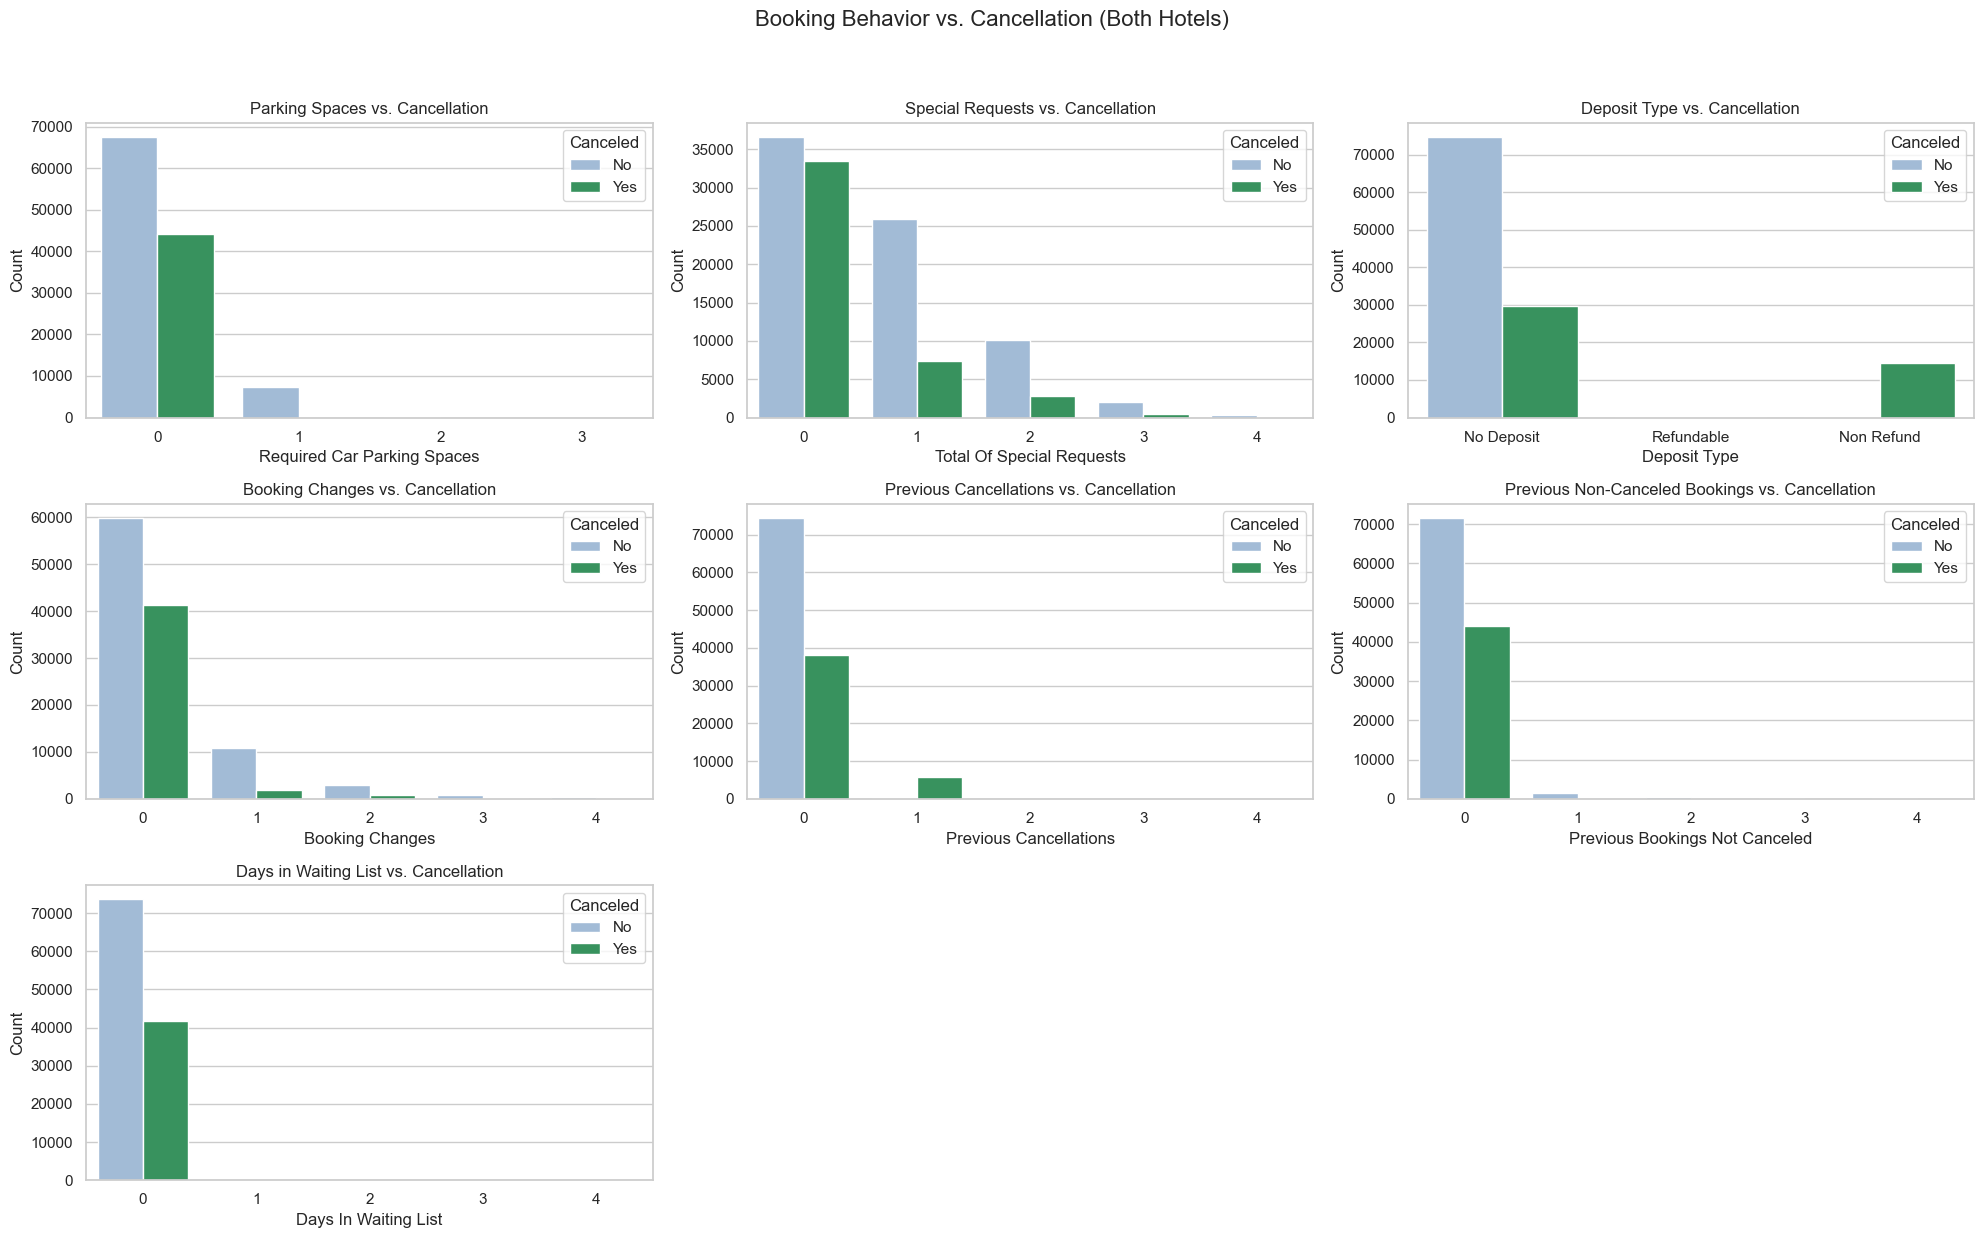

In [209]:
plot_lead_time_and_adr_by_cancellation(data)
plot_booking_behavior_counts(data)


In [168]:
def plot_lead_time_and_adr_by_cancellation_per_hotel(data):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set(style="whitegrid")
    hotels = ['Resort Hotel', 'City Hotel']
    palette = ['#99badf', '#29a15c']

    # Plot 1: Lead Time
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    for i, hotel in enumerate(hotels):
        subset = data[data['hotel'] == hotel]
        sns.boxplot(
            data=subset,
            x='is_canceled',
            y='lead_time',
            palette=palette,
            ax=axes[i]
        )
        axes[i].set_title(f'{hotel} — Lead Time vs. Cancellation')
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['Not Canceled', 'Canceled'])
        axes[i].set_ylabel('Lead Time')
    plt.suptitle('Lead Time vs. Cancellation (Hotel Comparison)', y=1.05)
    plt.tight_layout()
    plt.show()

    # Plot 2: ADR
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    for i, hotel in enumerate(hotels):
        subset = data[data['hotel'] == hotel]
        sns.boxplot(
            data=subset,
            x='is_canceled',
            y='adr',
            palette=palette,
            ax=axes[i]
        )
        axes[i].set_title(f'{hotel} — ADR vs. Cancellation')
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['Not Canceled', 'Canceled'])
        axes[i].set_ylabel('ADR (€)')
    plt.suptitle('ADR vs. Cancellation (Hotel Comparison)', y=1.05)
    plt.tight_layout()
    plt.show()


def plot_booking_behavior_pairs_by_variable(data):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set(style="whitegrid")
    behavior_vars = [
        ('required_car_parking_spaces', 'Parking Spaces'),
        ('total_of_special_requests', 'Special Requests'),
        ('deposit_type', 'Deposit Type'),
        ('booking_changes', 'Booking Changes'),
        ('previous_cancellations', 'Previous Cancellations'),
        ('previous_bookings_not_canceled', 'Previous Non-Canceled Bookings'),
        ('days_in_waiting_list', 'Days in Waiting List')
    ]

    for col, title in behavior_vars:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
        for ax, hotel in zip(axes, ['Resort Hotel', 'City Hotel']):
            subset = data[data['hotel'] == hotel]
            filtered = subset[subset[col] <= 4] if subset[col].dtype != 'object' else subset

            sns.countplot(
                data=filtered,
                x=col,
                hue='is_canceled',
                palette=['#99badf', '#29a15c'],
                ax=ax
            )
            ax.set_title(f'{title} — {hotel}')
            ax.set_xlabel(col.replace('_', ' ').title())
            ax.set_ylabel('Count')
            ax.legend(title='Canceled', labels=['No', 'Yes'])

        plt.suptitle(f'{title} vs. Cancellation (Both Hotels)', y=1.03, fontsize=15)
        plt.tight_layout()
        plt.show()





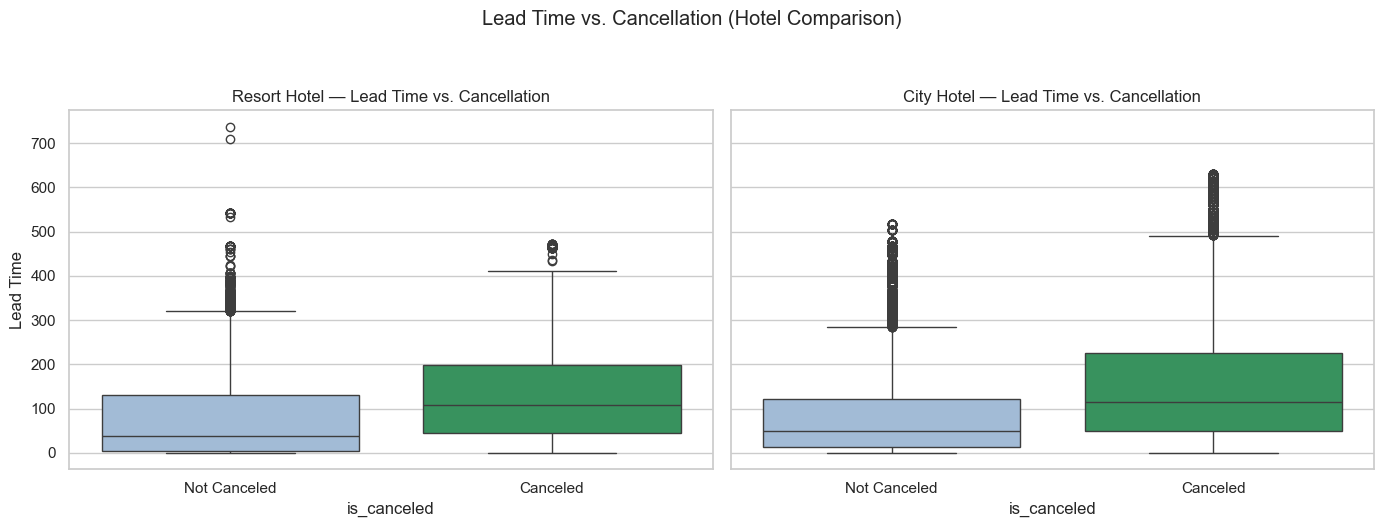

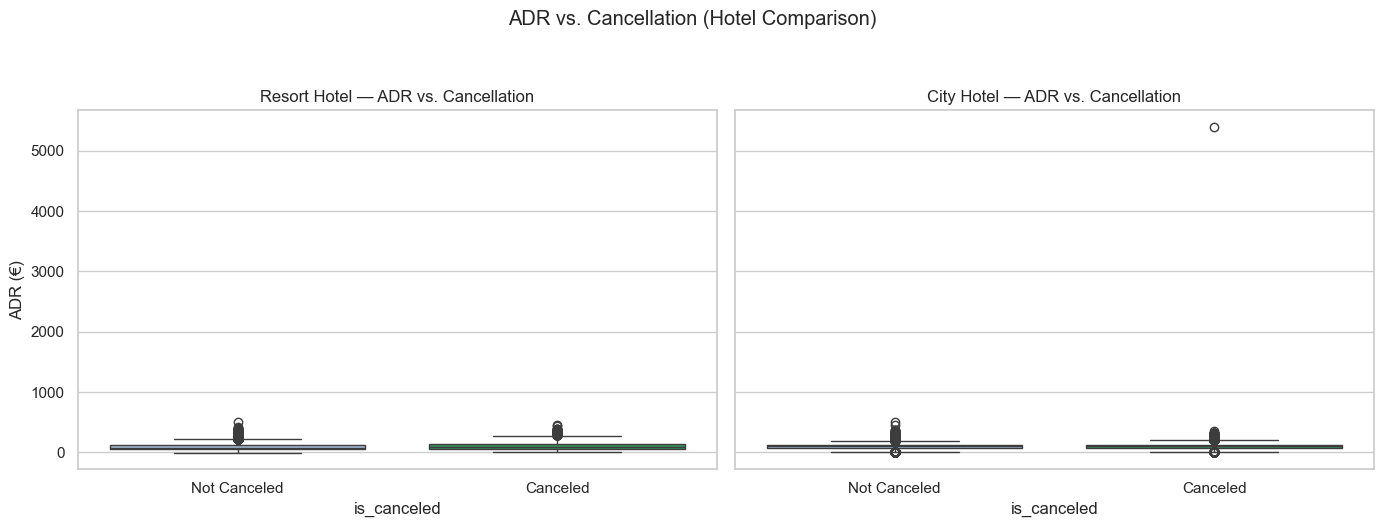

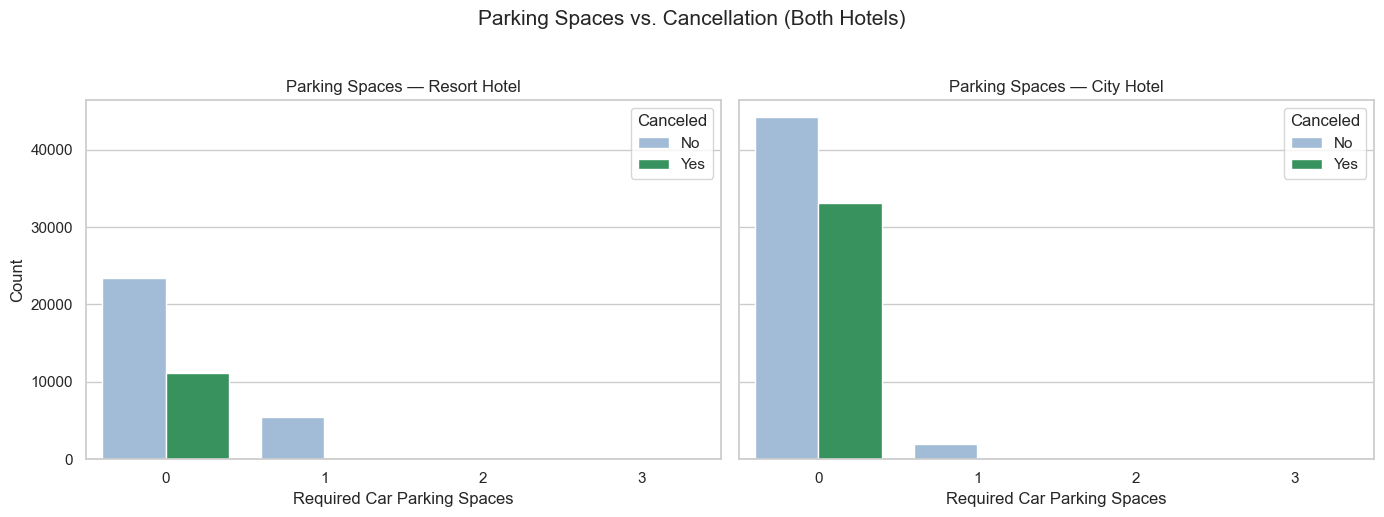

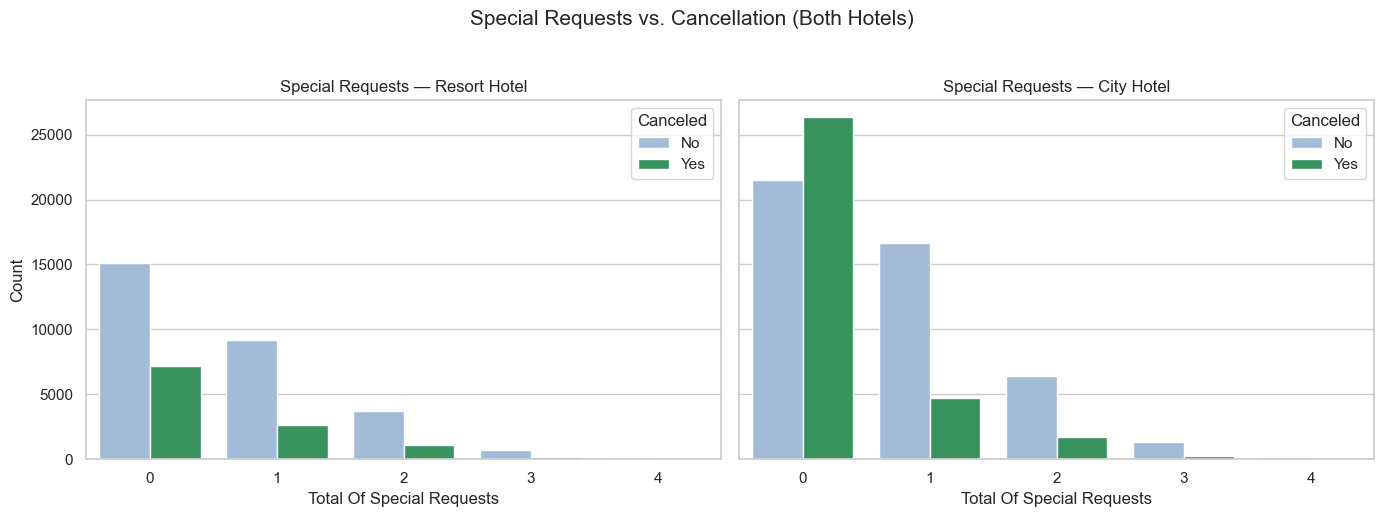

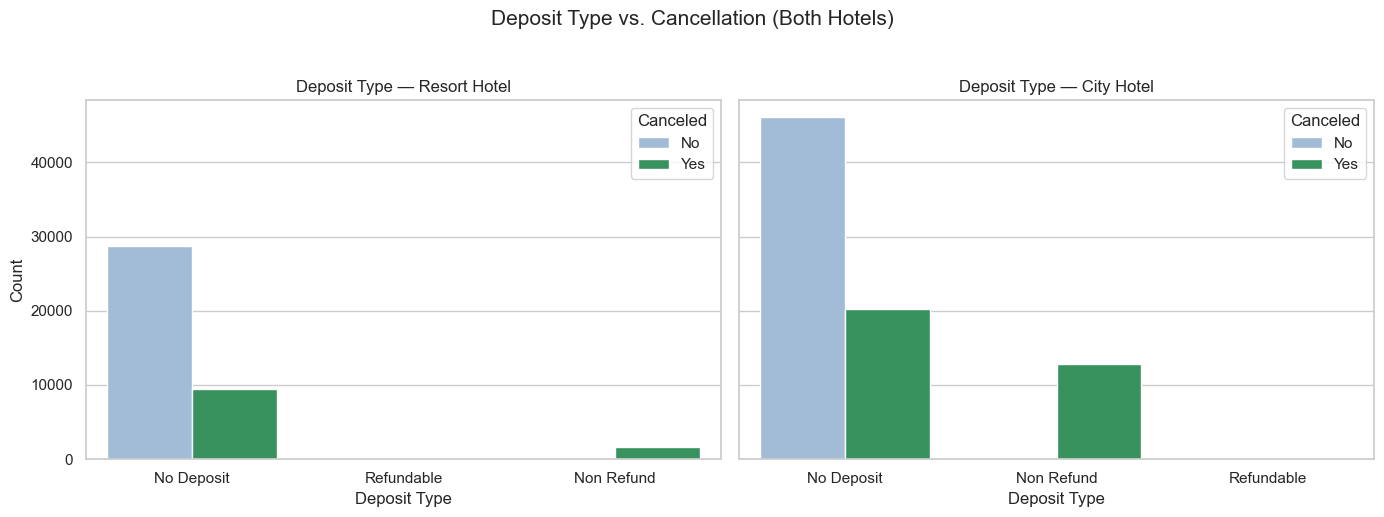

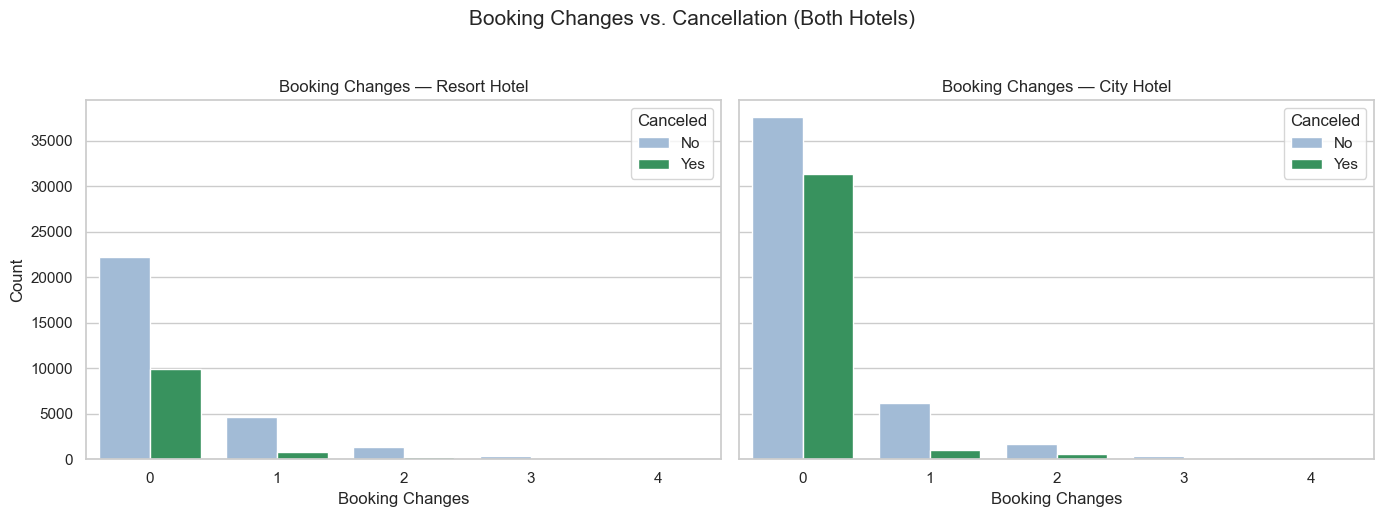

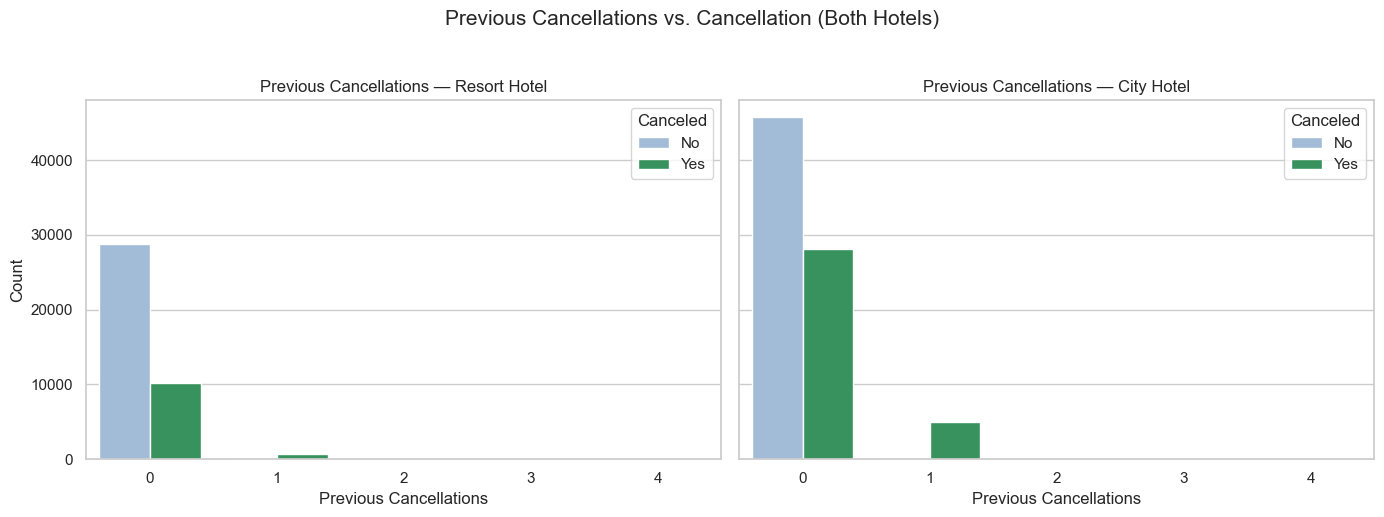

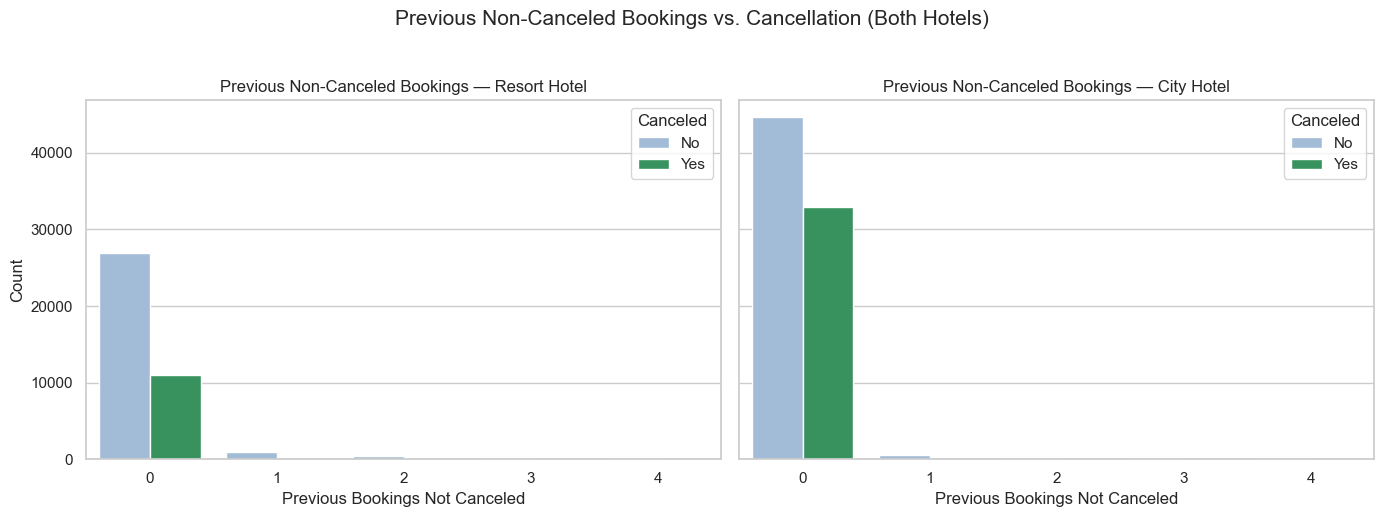

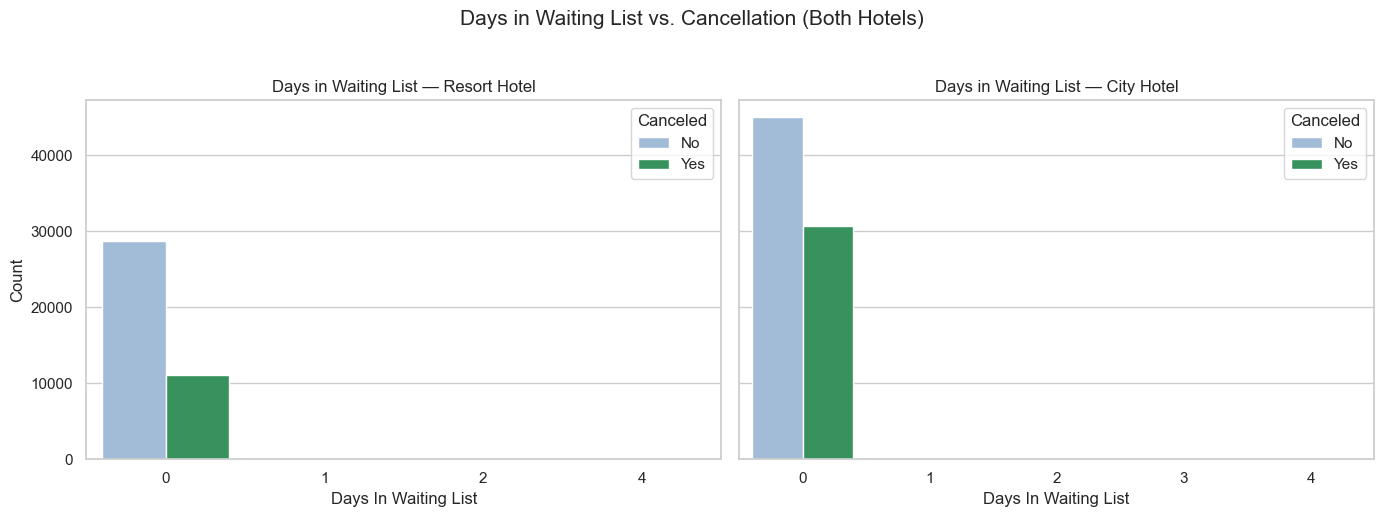

In [210]:
plot_lead_time_and_adr_by_cancellation_per_hotel(data)
plot_booking_behavior_pairs_by_variable(data)


### Correlation?

! important to know. is_canceled is binary (0/1), not continuous. Most correlation measures (like Pearson) are designed to capture linear relationships between continuous variables. Binary variables can only show limited variance, so even strong trends may result in low correlation coefficients.

Therefore, lets try: Point-biserial correlation: Special case of Pearson, adapted for binary + continuous

In [146]:
def compute_pointbiserial_correlations(data, target='is_canceled'):
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = numeric_cols.drop(target)

    results = []

    for col in numeric_cols:
        corr, pval = pointbiserialr(data[target], data[col])
        results.append({
            'Feature': col,
            'Correlation': corr,
            'P-value': pval
        })

    # Create DataFrame
    corr_df = pd.DataFrame(results)
    corr_df['|Correlation|'] = corr_df['Correlation'].abs()
    corr_df = corr_df.sort_values(by='|Correlation|', ascending=False)

    return corr_df[['Feature', 'Correlation', 'P-value']]


In [148]:
pointbiserial_results = compute_pointbiserial_correlations(data)
display(pointbiserial_results)


,Feature,Correlation,P-value
0,lead_time,0.292876,0.000000e+00
18,total_of_special_requests,-0.234877,0.000000e+00
17,required_car_parking_spaces,-0.195701,0.000000e+00
12,booking_changes,-0.144832,0.000000e+00
10,previous_cancellations,0.110139,2.460447e-318
9,is_repeated_guest,-0.083745,1.805515e-184
6,adults,0.058182,6.623361e-90
11,previous_bookings_not_canceled,-0.057365,1.904405e-87
15,days_in_waiting_list,0.054301,1.539336e-78
13,agent,-0.051954,4.793052e-72
